# Enhanced Report Display - Individual Models vs Ensemble

This notebook displays comprehensive results comparing individual feature-based models with ensemble performance.

In [1]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os
import glob
from scipy.stats import ttest_rel
from modules.PostgresDBHandler import PostgresDBHandler

FEATURE_TYPES = [
    'mel_spectrogram', 'mfcc', 'chromagram', 'spectral_contrast',
    'tonnetz', 'constant_q', 'stft', 'harmonic_percussive', 'onset_strength'
]

dbParams = {
    "dbname": "mydatabase",
    "user": "myuser",
    "password": "mypassword",
    "host": "postgres_server",
    "port": "5432",
}

In [2]:
db = PostgresDBHandler(**dbParams)
db.connect()
instrument_df = db.get_mappings_instruments()
db.close()

class_names = [name for _, name in sorted(zip(instrument_df['instrumentid'], instrument_df['name']))]
print("Class names:", class_names)

Class names: ['trumpet', 'oboe', 'bass', 'violin', 'cello', 'clarinet', 'piccolo', 'sax', 'flute']


In [3]:
# Find and load the latest ensemble results
ensemble_results_files = sorted(glob.glob("ensemble_results/ensemble_results_*.json"), reverse=True)
if not ensemble_results_files:
    raise FileNotFoundError("No ensemble results file found in ensemble_results/ directory.")
ENSEMBLE_RESULTS_PATH = ensemble_results_files[0]

with open(ENSEMBLE_RESULTS_PATH, "r") as file:
    ensemble_results = json.load(file)

print(f"Loaded ensemble results from: {ENSEMBLE_RESULTS_PATH}")

Loaded ensemble results from: ensemble_results/ensemble_results_2025_07_13.json


In [4]:
# Load individual model results for all feature types
individual_results = {}
for feature_type in FEATURE_TYPES:
    results_path = f"models/{feature_type}/results.json"
    if os.path.exists(results_path):
        with open(results_path, "r") as f:
            individual_results[feature_type] = json.load(f)
    else:
        print(f"Results not found for {feature_type}")

In [5]:
# Display ensemble accuracy statistics
accs = ensemble_results['accuracy_list']
print("Ensemble Accuracies (per fold):", accs)
print(f"Mean Ensemble Accuracy: {np.mean(accs):.4f}")
print(f"Std Ensemble Accuracy: {np.std(accs):.4f}")
print(f"Min Ensemble Accuracy: {np.min(accs):.4f}")
print(f"Max Ensemble Accuracy: {np.max(accs):.4f}")

Ensemble Accuracies (per fold): [0.96826171875, 0.9653150952613581, 0.9721543722520762, 0.9677576941866145, 0.9692232535417684]
Mean Ensemble Accuracy: 0.9685
Std Ensemble Accuracy: 0.0022
Min Ensemble Accuracy: 0.9653
Max Ensemble Accuracy: 0.9722


In [6]:
# Display ensemble classification reports for each fold
for i, report in enumerate(ensemble_results['classification_reports']):
    df = pd.DataFrame(report).transpose()
    df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
    display(df)

precision    recall  f1-score      support
trumpet        0.976378  0.980237  0.978304   253.000000
oboe           0.956863  0.964427  0.960630   253.000000
bass           0.990991  0.982143  0.986547   112.000000
violin         0.973451  0.995475  0.984340   221.000000
cello          0.981735  0.964126  0.972851   223.000000
clarinet       0.937500  0.922131  0.929752   244.000000
piccolo        0.952381  0.967742  0.960000   248.000000
sax            0.976923  0.965779  0.971319   263.000000
flute          0.982684  0.982684  0.982684   231.000000
accuracy       0.968262  0.968262  0.968262     0.968262
macro avg      0.969878  0.969416  0.969603  2048.000000
weighted avg   0.968277  0.968262  0.968225  2048.000000

precision    recall  f1-score      support
trumpet        0.985782  0.967442  0.976526   215.000000
oboe           0.975207  0.955466  0.965235   247.000000
bass           1.000000  0.985816  0.992857   141.000000
violin         0.991071  0.965217  0.977974   230.000000
cello          0.991597  0.940239  0.965235   251.000000
clarinet       0.895161  0.944681  0.919255   235.000000
piccolo        0.930041  0.982609  0.955603   230.000000
sax            0.975410  0.971429  0.973415   245.000000
flute          0.965116  0.984190  0.974560   253.000000
accuracy       0.965315  0.965315  0.965315     0.965315
macro avg      0.967709  0.966343  0.966740  2047.000000
weighted avg   0.966331  0.965315  0.965525  2047.000000

precision    recall  f1-score      support
trumpet        0.986486  0.948052  0.966887   231.000000
oboe           0.967742  0.995851  0.981595   241.000000
bass           1.000000  0.923664  0.960317   131.000000
violin         0.988235  1.000000  0.994083   252.000000
cello          0.966805  0.970833  0.968815   240.000000
clarinet       0.930769  0.968000  0.949020   250.000000
piccolo        0.982609  0.974138  0.978355   232.000000
sax            0.995885  0.971888  0.983740   249.000000
flute          0.947137  0.972851  0.959821   221.000000
accuracy       0.972154  0.972154  0.972154     0.972154
macro avg      0.973963  0.969475  0.971404  2047.000000
weighted avg   0.972703  0.972154  0.972177  2047.000000

precision    recall  f1-score      support
trumpet        0.975000  0.947368  0.960986   247.000000
oboe           0.970213  0.950000  0.960000   240.000000
bass           1.000000  0.969231  0.984375   130.000000
violin         0.988848  0.981550  0.985185   271.000000
cello          0.979424  0.979424  0.979424   243.000000
clarinet       0.919028  0.941909  0.930328   241.000000
piccolo        0.926724  0.986239  0.955556   218.000000
sax            0.981132  0.971963  0.976526   214.000000
flute          0.983539  0.983539  0.983539   243.000000
accuracy       0.967758  0.967758  0.967758     0.967758
macro avg      0.969323  0.967914  0.968435  2047.000000
weighted avg   0.968309  0.967758  0.967862  2047.000000

precision    recall  f1-score      support
trumpet        0.976378  0.976378  0.976378   254.000000
oboe           0.981481  0.968037  0.974713   219.000000
bass           1.000000  0.959016  0.979079   122.000000
violin         0.977974  0.982301  0.980132   226.000000
cello          0.971074  0.967078  0.969072   243.000000
clarinet       0.909465  0.960870  0.934461   230.000000
piccolo        0.963370  0.966912  0.965138   272.000000
sax            0.981900  0.947598  0.964444   229.000000
flute          0.980315  0.988095  0.984190   252.000000
accuracy       0.969223  0.969223  0.969223     0.969223
macro avg      0.971329  0.968476  0.969734  2047.000000
weighted avg   0.969734  0.969223  0.969331  2047.000000

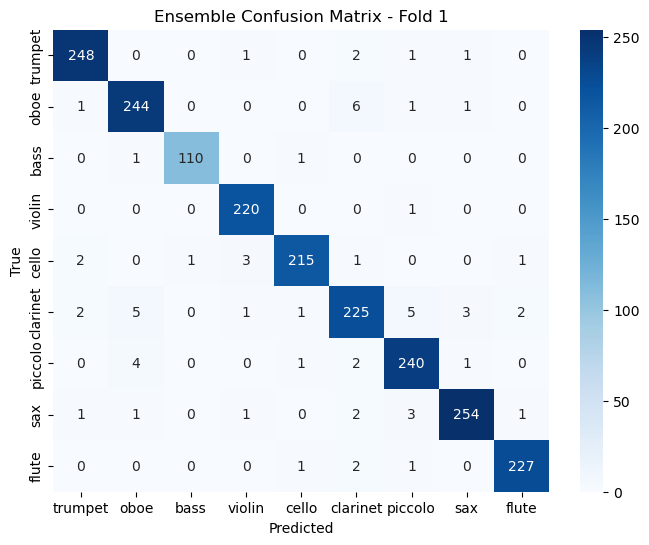

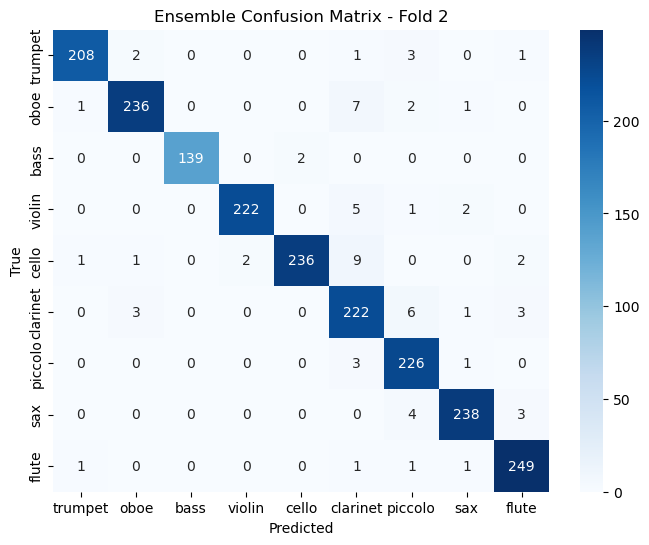

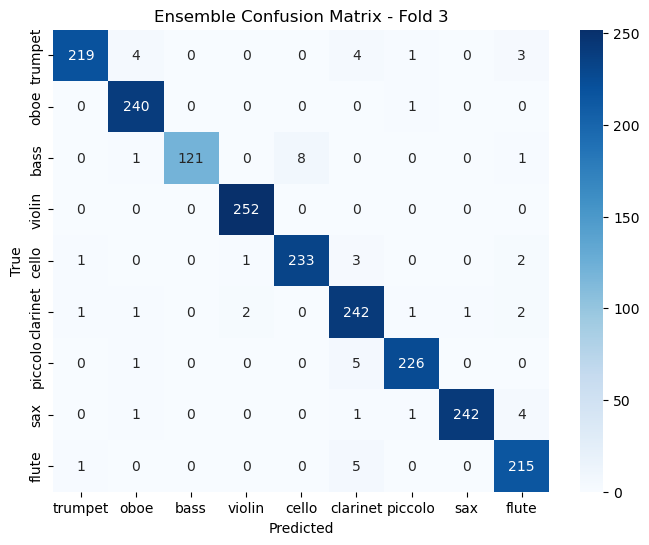

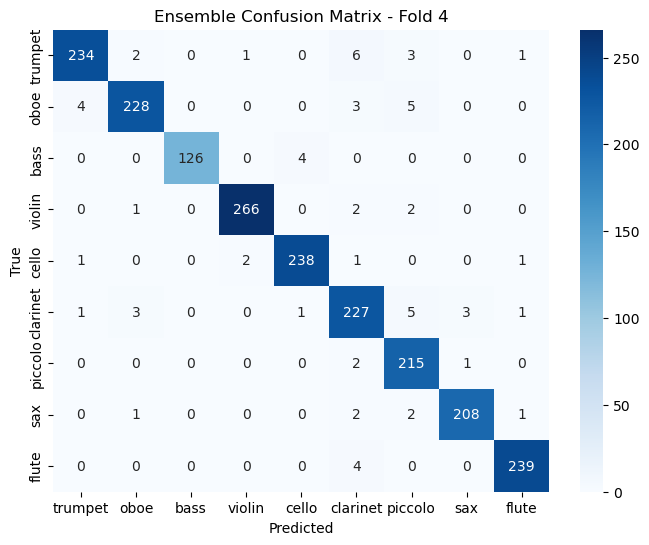

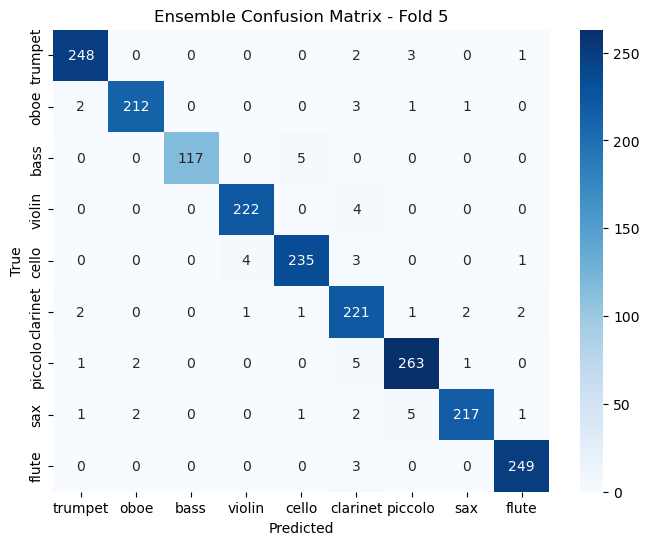

In [7]:
# Display ensemble confusion matrices for each fold
for i, conf_matrix in enumerate(ensemble_results['confusion_matrices']):
    plt.figure(figsize=(8, 6))
    sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f"Ensemble Confusion Matrix - Fold {i+1}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [8]:
# Create a summary DataFrame for individual models
performance_data = []
for feature_type, results in individual_results.items():
    accuracies = results['accuracy_list']
    losses = results['loss_list']
    performance_data.append({
        'Feature Type': feature_type.replace('_', ' ').title(),
        'Mean Accuracy': np.mean(accuracies),
        'Std Accuracy': np.std(accuracies),
        'Min Accuracy': np.min(accuracies),
        'Max Accuracy': np.max(accuracies),
        'Mean Loss': np.mean(losses),
        'Std Loss': np.std(losses)
    })

performance_df = pd.DataFrame(performance_data)
performance_df = performance_df.sort_values('Mean Accuracy', ascending=False)
display(performance_df.round(4))

Feature Type  Mean Accuracy  Std Accuracy  Min Accuracy  \
7  Harmonic Percussive         0.9466        0.0070        0.9365   
0      Mel Spectrogram         0.9416        0.0055        0.9355   
5           Constant Q         0.9207        0.0122        0.9028   
6                 Stft         0.8254        0.0130        0.8046   
1                 Mfcc         0.8242        0.0078        0.8149   
4              Tonnetz         0.5009        0.0193        0.4797   
3    Spectral Contrast         0.4880        0.0167        0.4748   
2           Chromagram         0.4672        0.0291        0.4187   
8       Onset Strength         0.3129        0.0082        0.3034   

   Max Accuracy  Mean Loss  Std Loss  
7        0.9580     7.3166    2.0462  
0        0.9482     0.3754    0.0225  
5        0.9355     0.6139    0.1707  
6        0.8451     1.8703    0.4315  
1        0.8339     0.5351    0.0266  
4        0.5264     1.5118    0.0445  
3        0.5166     1.5075    0.0090  
2        0.5020     1.5968    0.0852  
8        0.3239     1.8865    0.0109


Mel Spectrogram Model
Accuracies: [0.93896484375, 0.9369809627532959, 0.9355154037475586, 0.9482169151306152, 0.9482169151306152]
Mean: 0.9416, Std: 0.0055, Min: 0.9355, Max: 0.9482


precision    recall  f1-score      support
trumpet        0.945525  0.960474  0.952941   253.000000
oboe           0.934363  0.956522  0.945312   253.000000
bass           0.982143  0.982143  0.982143   112.000000
violin         0.955157  0.963801  0.959459   221.000000
cello          0.904167  0.973094  0.937365   223.000000
clarinet       0.876000  0.897541  0.886640   244.000000
piccolo        0.933594  0.963710  0.948413   248.000000
sax            0.966667  0.882129  0.922465   263.000000
flute          0.985782  0.900433  0.941176   231.000000
accuracy       0.938965  0.938965  0.938965     0.938965
macro avg      0.942600  0.942205  0.941768  2048.000000
weighted avg   0.940212  0.938965  0.938915  2048.000000

precision    recall  f1-score      support
trumpet        0.967290  0.962791  0.965035   215.000000
oboe           0.944444  0.963563  0.953908   247.000000
bass           0.963768  0.943262  0.953405   141.000000
violin         0.985782  0.904348  0.943311   230.000000
cello          0.954733  0.924303  0.939271   251.000000
clarinet       0.827451  0.897872  0.861224   235.000000
piccolo        0.938865  0.934783  0.936819   230.000000
sax            0.927711  0.942857  0.935223   245.000000
flute          0.949219  0.960474  0.954813   253.000000
accuracy       0.936981  0.936981  0.936981     0.936981
macro avg      0.939918  0.937139  0.938112  2047.000000
weighted avg   0.938610  0.936981  0.937372  2047.000000

precision    recall  f1-score      support
trumpet        0.951542  0.935065  0.943231   231.000000
oboe           0.957983  0.946058  0.951983   241.000000
bass           1.000000  0.877863  0.934959   131.000000
violin         0.967480  0.944444  0.955823   252.000000
cello          0.870370  0.979167  0.921569   240.000000
clarinet       0.837638  0.908000  0.871401   250.000000
piccolo        0.972603  0.918103  0.944568   232.000000
sax            0.966942  0.939759  0.953157   249.000000
flute          0.954338  0.945701  0.950000   221.000000
accuracy       0.935515  0.935515  0.935515     0.935515
macro avg      0.942100  0.932685  0.936299  2047.000000
weighted avg   0.938498  0.935515  0.936060  2047.000000

precision    recall  f1-score      support
trumpet        0.950617  0.935223  0.942857   247.000000
oboe           0.982609  0.941667  0.961702   240.000000
bass           1.000000  0.938462  0.968254   130.000000
violin         0.970037  0.955720  0.962825   271.000000
cello          0.929688  0.979424  0.953908   243.000000
clarinet       0.877551  0.892116  0.884774   241.000000
piccolo        0.950226  0.963303  0.956720   218.000000
sax            0.937220  0.976636  0.956522   214.000000
flute          0.962500  0.950617  0.956522   243.000000
accuracy       0.948217  0.948217  0.948217     0.948217
macro avg      0.951161  0.948130  0.949343  2047.000000
weighted avg   0.948957  0.948217  0.948324  2047.000000

precision    recall  f1-score      support
trumpet        0.955645  0.933071  0.944223   254.000000
oboe           0.945946  0.958904  0.952381   219.000000
bass           1.000000  0.959016  0.979079   122.000000
violin         0.964126  0.951327  0.957684   226.000000
cello          0.955466  0.971193  0.963265   243.000000
clarinet       0.870293  0.904348  0.886994   230.000000
piccolo        0.962547  0.944853  0.953618   272.000000
sax            0.951542  0.943231  0.947368   229.000000
flute          0.953307  0.972222  0.962672   252.000000
accuracy       0.948217  0.948217  0.948217     0.948217
macro avg      0.950986  0.948685  0.949698  2047.000000
weighted avg   0.948746  0.948217  0.948361  2047.000000

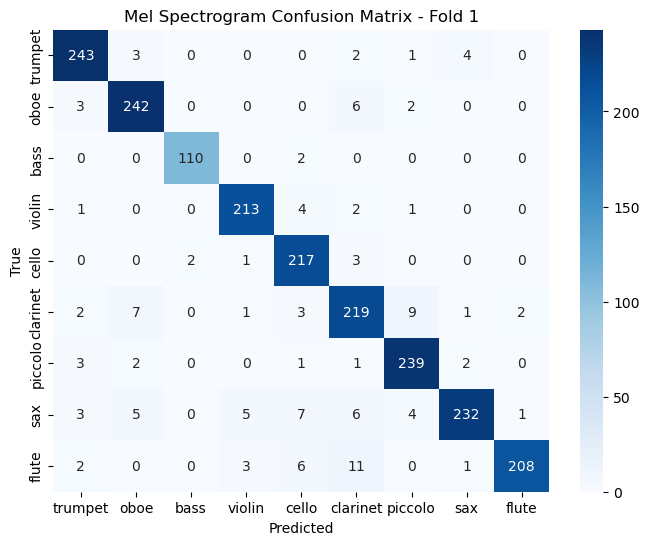

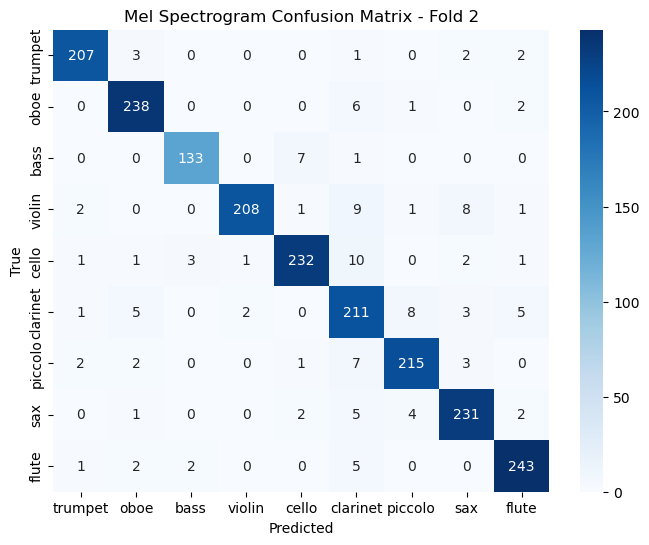

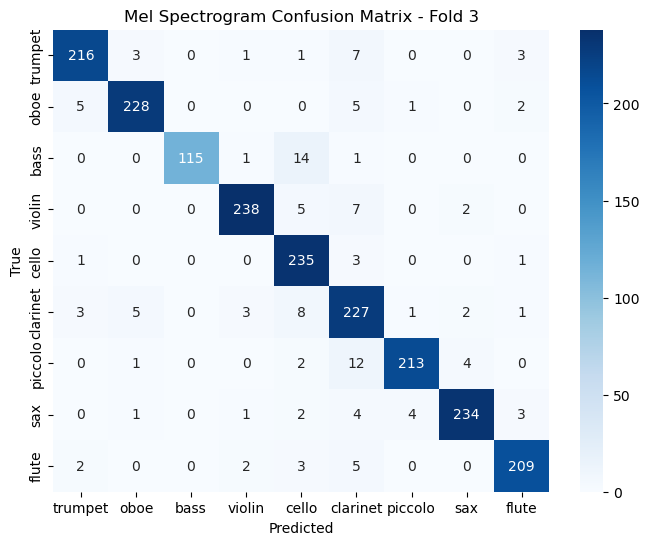

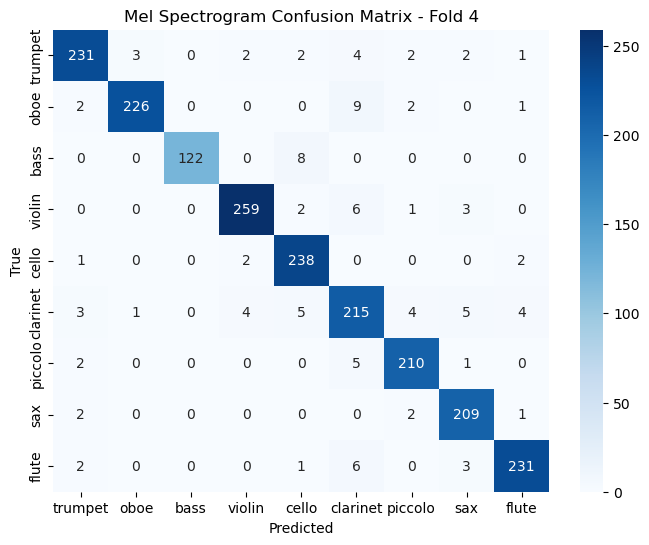

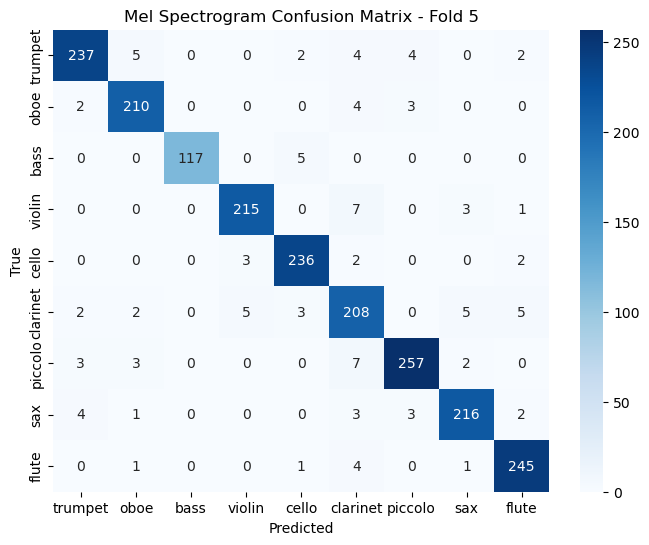


Mfcc Model
Accuracies: [0.81494140625, 0.8339032530784607, 0.8324376940727234, 0.8168050646781921, 0.8226673007011414]
Mean: 0.8242, Std: 0.0078, Min: 0.8149, Max: 0.8339


precision    recall  f1-score      support
trumpet        0.865854  0.841897  0.853707   253.000000
oboe           0.858736  0.913043  0.885057   253.000000
bass           0.961538  0.892857  0.925926   112.000000
violin         0.762931  0.800905  0.781457   221.000000
cello          0.798283  0.834081  0.815789   223.000000
clarinet       0.751174  0.655738  0.700219   244.000000
piccolo        0.840304  0.891129  0.864971   248.000000
sax            0.780172  0.688213  0.731313   263.000000
flute          0.781250  0.865801  0.821355   231.000000
accuracy       0.814941  0.814941  0.814941     0.814941
macro avg      0.822249  0.820407  0.819977  2048.000000
weighted avg   0.814441  0.814941  0.813315  2048.000000

precision    recall  f1-score      support
trumpet        0.875000  0.748837  0.807018   215.000000
oboe           0.847584  0.923077  0.883721   247.000000
bass           0.917241  0.943262  0.930070   141.000000
violin         0.905556  0.708696  0.795122   230.000000
cello          0.894958  0.848606  0.871166   251.000000
clarinet       0.634686  0.731915  0.679842   235.000000
piccolo        0.825581  0.926087  0.872951   230.000000
sax            0.781250  0.816327  0.798403   245.000000
flute          0.910569  0.885375  0.897796   253.000000
accuracy       0.833903  0.833903  0.833903     0.833903
macro avg      0.843603  0.836909  0.837343  2047.000000
weighted avg   0.840516  0.833903  0.834275  2047.000000

precision    recall  f1-score      support
trumpet        0.943590  0.796537  0.863850   231.000000
oboe           0.789474  0.933610  0.855513   241.000000
bass           0.926829  0.870229  0.897638   131.000000
violin         0.931373  0.753968  0.833333   252.000000
cello          0.933333  0.816667  0.871111   240.000000
clarinet       0.700375  0.748000  0.723404   250.000000
piccolo        0.828685  0.896552  0.861284   232.000000
sax            0.735075  0.791165  0.762089   249.000000
flute          0.831967  0.918552  0.873118   221.000000
accuracy       0.832438  0.832438  0.832438     0.832438
macro avg      0.846744  0.836142  0.837927  2047.000000
weighted avg   0.841524  0.832438  0.833304  2047.000000

precision    recall  f1-score      support
trumpet        0.828452  0.801619  0.814815   247.000000
oboe           0.918269  0.795833  0.852679   240.000000
bass           0.968000  0.930769  0.949020   130.000000
violin         0.817121  0.774908  0.795455   271.000000
cello          0.839662  0.818930  0.829167   243.000000
clarinet       0.667939  0.726141  0.695825   241.000000
piccolo        0.828452  0.908257  0.866521   218.000000
sax            0.779487  0.710280  0.743276   214.000000
flute          0.800000  0.938272  0.863636   243.000000
accuracy       0.816805  0.816805  0.816805     0.816805
macro avg      0.827487  0.822779  0.823377  2047.000000
weighted avg   0.820281  0.816805  0.816732  2047.000000

precision    recall  f1-score      support
trumpet        0.855422  0.838583  0.846918   254.000000
oboe           0.894737  0.776256  0.831296   219.000000
bass           0.912698  0.942623  0.927419   122.000000
violin         0.836449  0.792035  0.813636   226.000000
cello          0.861925  0.847737  0.854772   243.000000
clarinet       0.600000  0.782609  0.679245   230.000000
piccolo        0.954167  0.841912  0.894531   272.000000
sax            0.847458  0.655022  0.738916   229.000000
flute          0.775641  0.960317  0.858156   252.000000
accuracy       0.822667  0.822667  0.822667     0.822667
macro avg      0.837611  0.826344  0.827210  2047.000000
weighted avg   0.835428  0.822667  0.824091  2047.000000

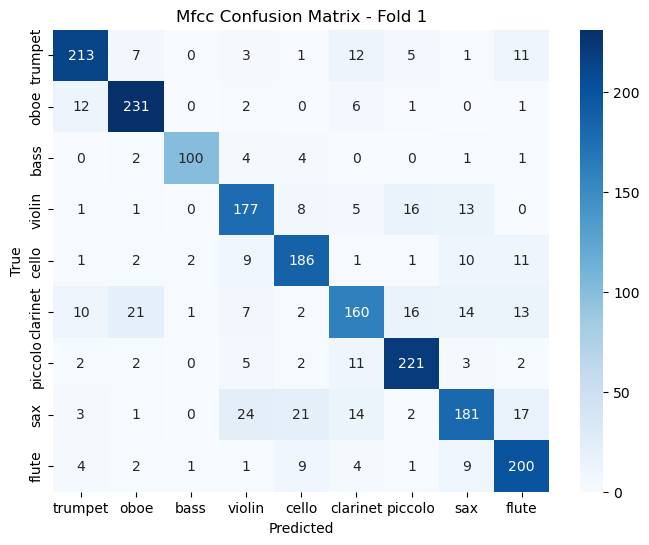

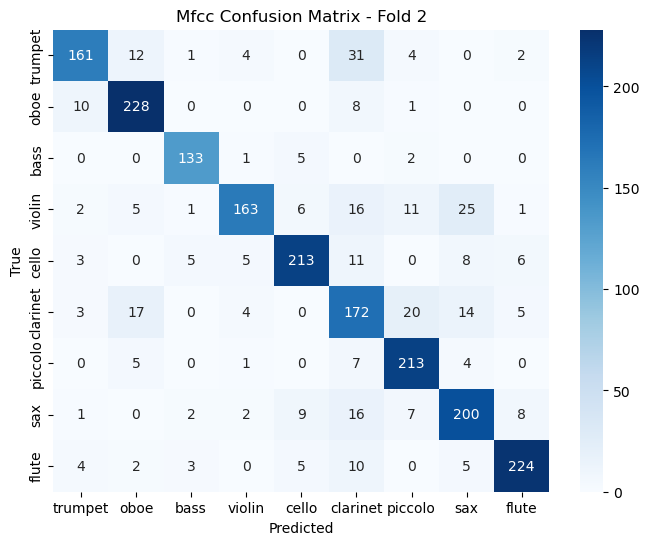

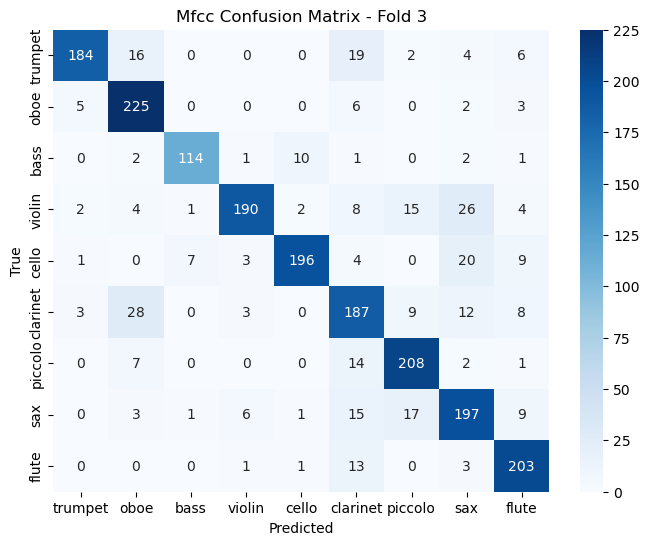

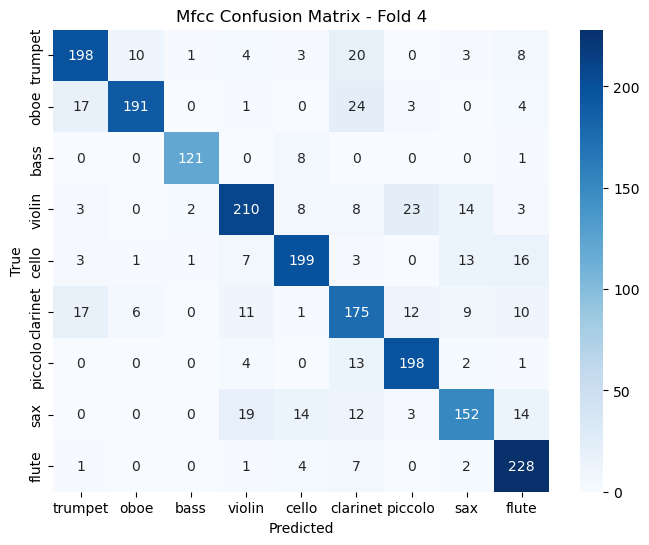

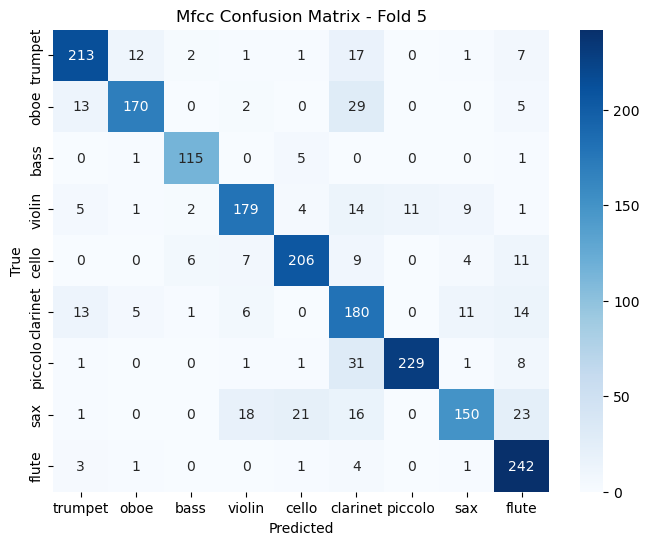


Chromagram Model
Accuracies: [0.501953125, 0.4186614453792572, 0.4518808126449585, 0.4846116304397583, 0.4787493944168091]
Mean: 0.4672, Std: 0.0291, Min: 0.4187, Max: 0.5020


precision    recall  f1-score      support
trumpet        0.577465  0.648221  0.610801   253.000000
oboe           0.729885  0.501976  0.594848   253.000000
bass           0.608696  0.625000  0.616740   112.000000
violin         0.353952  0.466063  0.402344   221.000000
cello          0.489270  0.511211  0.500000   223.000000
clarinet       0.373832  0.327869  0.349345   244.000000
piccolo        0.461224  0.455645  0.458418   248.000000
sax            0.466063  0.391635  0.425620   263.000000
flute          0.568266  0.666667  0.613546   231.000000
accuracy       0.501953  0.501953  0.501953     0.501953
macro avg      0.514295  0.510476  0.507962  2048.000000
weighted avg   0.510599  0.501953  0.501522  2048.000000

precision    recall  f1-score      support
trumpet        0.569507  0.590698  0.579909   215.000000
oboe           0.385650  0.696356  0.496392   247.000000
bass           0.828571  0.411348  0.549763   141.000000
violin         0.266667  0.365217  0.308257   230.000000
cello          0.490566  0.207171  0.291317   251.000000
clarinet       0.509615  0.225532  0.312684   235.000000
piccolo        0.317073  0.678261  0.432133   230.000000
sax            0.393162  0.187755  0.254144   245.000000
flute          0.626437  0.430830  0.510539   253.000000
accuracy       0.418661  0.418661  0.418661     0.418661
macro avg      0.487472  0.421463  0.415015  2047.000000
weighted avg   0.472151  0.418661  0.407000  2047.000000

precision    recall  f1-score      support
trumpet        0.567050  0.640693  0.601626   231.000000
oboe           0.600962  0.518672  0.556793   241.000000
bass           0.616541  0.625954  0.621212   131.000000
violin         0.302632  0.365079  0.330935   252.000000
cello          0.352645  0.583333  0.439560   240.000000
clarinet       0.439394  0.232000  0.303665   250.000000
piccolo        0.474576  0.362069  0.410758   232.000000
sax            0.493243  0.293173  0.367758   249.000000
flute          0.428571  0.556561  0.484252   221.000000
accuracy       0.451881  0.451881  0.451881     0.451881
macro avg      0.475068  0.464170  0.457396  2047.000000
weighted avg   0.466520  0.451881  0.446133  2047.000000

precision    recall  f1-score      support
trumpet        0.632479  0.599190  0.615385   247.000000
oboe           0.390663  0.662500  0.491499   240.000000
bass           0.811881  0.630769  0.709957   130.000000
violin         0.417178  0.250923  0.313364   271.000000
cello          0.505882  0.353909  0.416465   243.000000
clarinet       0.323450  0.497925  0.392157   241.000000
piccolo        0.462121  0.559633  0.506224   218.000000
sax            0.446927  0.373832  0.407125   214.000000
flute          0.803797  0.522634  0.633416   243.000000
accuracy       0.484612  0.484612  0.484612     0.484612
macro avg      0.532709  0.494591  0.498399  2047.000000
weighted avg   0.518402  0.484612  0.485730  2047.000000

precision    recall  f1-score      support
trumpet        0.531353  0.633858  0.578097   254.000000
oboe           0.424342  0.589041  0.493308   219.000000
bass           0.713043  0.672131  0.691983   122.000000
violin         0.334520  0.415929  0.370809   226.000000
cello          0.481633  0.485597  0.483607   243.000000
clarinet       0.490683  0.343478  0.404092   230.000000
piccolo        0.424812  0.415441  0.420074   272.000000
sax            0.454545  0.305677  0.365535   229.000000
flute          0.614679  0.531746  0.570213   252.000000
accuracy       0.478749  0.478749  0.478749     0.478749
macro avg      0.496623  0.488100  0.486413  2047.000000
weighted avg   0.486038  0.478749  0.476412  2047.000000

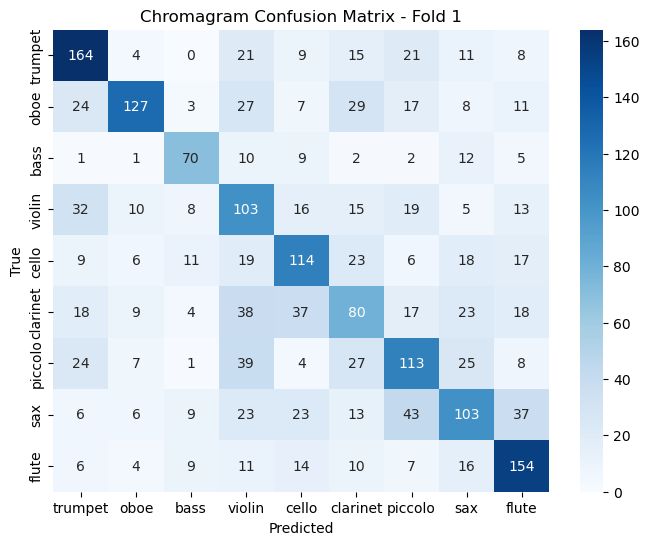

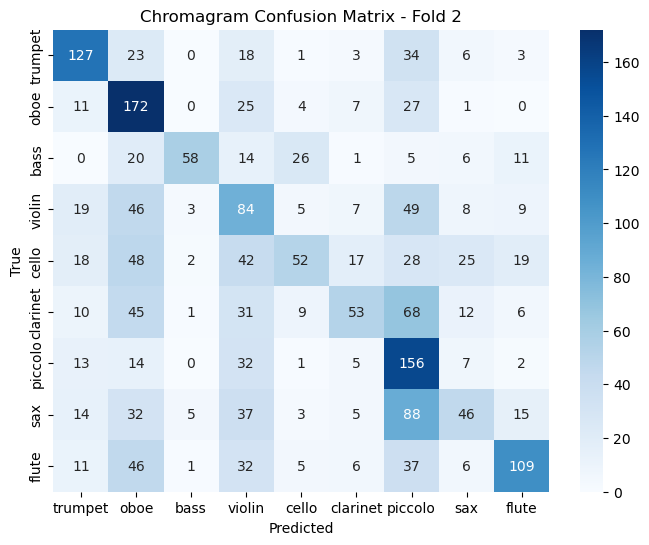

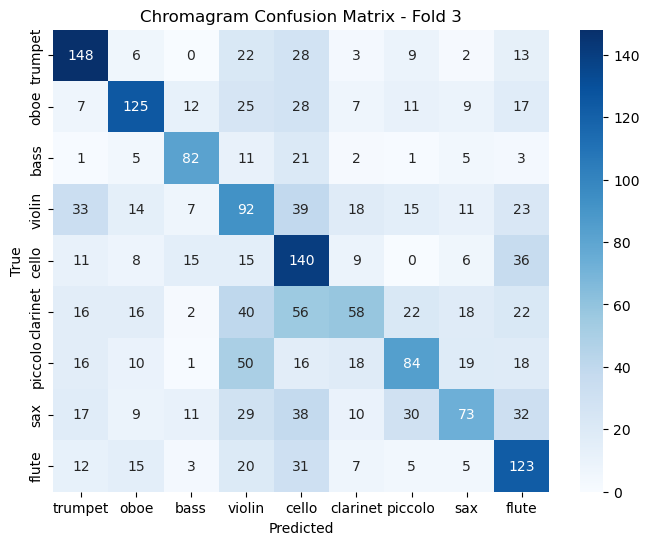

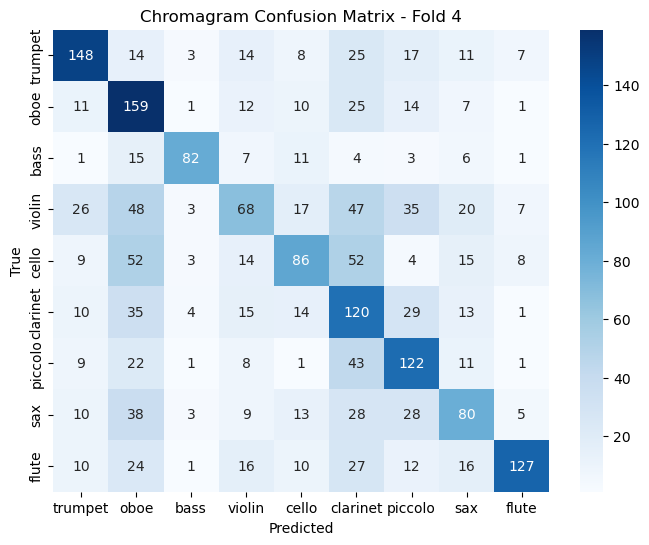

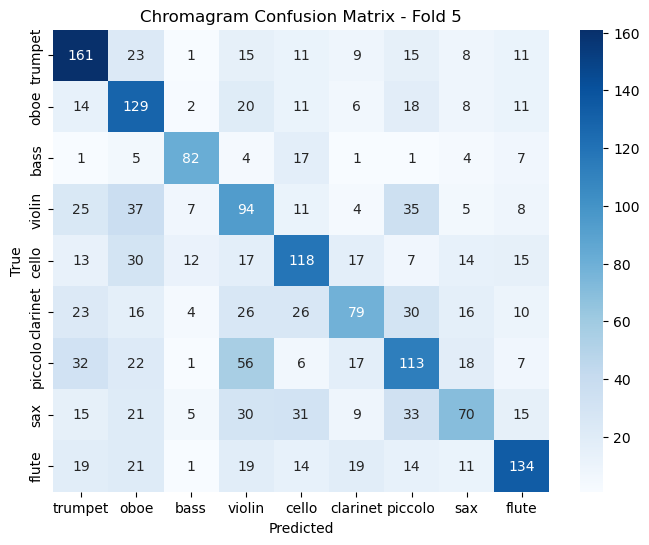


Spectral Contrast Model
Accuracies: [0.5166015625, 0.47484123706817627, 0.49731314182281494, 0.4758182764053345, 0.47532975673675537]
Mean: 0.4880, Std: 0.0167, Min: 0.4748, Max: 0.5166


precision    recall  f1-score      support
trumpet        0.503846  0.517787  0.510721   253.000000
oboe           0.537500  0.509881  0.523327   253.000000
bass           0.741573  0.589286  0.656716   112.000000
violin         0.381988  0.556561  0.453039   221.000000
cello          0.598726  0.421525  0.494737   223.000000
clarinet       0.456693  0.475410  0.465863   244.000000
piccolo        0.627660  0.475806  0.541284   248.000000
sax            0.456716  0.581749  0.511706   263.000000
flute          0.630542  0.554113  0.589862   231.000000
accuracy       0.516602  0.516602  0.516602     0.516602
macro avg      0.548360  0.520235  0.527473  2048.000000
weighted avg   0.535799  0.516602  0.519707  2048.000000

precision    recall  f1-score      support
trumpet        0.463415  0.618605  0.529880   215.000000
oboe           0.627219  0.429150  0.509615   247.000000
bass           0.767677  0.539007  0.633333   141.000000
violin         0.368771  0.482609  0.418079   230.000000
cello          0.640000  0.254980  0.364672   251.000000
clarinet       0.369565  0.289362  0.324582   235.000000
piccolo        0.385475  0.900000  0.539765   230.000000
sax            0.636364  0.228571  0.336336   245.000000
flute          0.535461  0.596838  0.564486   253.000000
accuracy       0.474841  0.474841  0.474841     0.474841
macro avg      0.532661  0.482125  0.468972  2047.000000
weighted avg   0.525229  0.474841  0.460396  2047.000000

precision    recall  f1-score      support
trumpet        0.469484  0.432900  0.450450   231.000000
oboe           0.674419  0.481328  0.561743   241.000000
bass           0.577640  0.709924  0.636986   131.000000
violin         0.528302  0.333333  0.408759   252.000000
cello          0.491597  0.487500  0.489540   240.000000
clarinet       0.421569  0.344000  0.378855   250.000000
piccolo        0.560784  0.616379  0.587269   232.000000
sax            0.438538  0.530120  0.480000   249.000000
flute          0.427326  0.665158  0.520354   221.000000
accuracy       0.497313  0.497313  0.497313     0.497313
macro avg      0.509962  0.511183  0.501551  2047.000000
weighted avg   0.506547  0.497313  0.492845  2047.000000

precision    recall  f1-score      support
trumpet        0.383285  0.538462  0.447811   247.000000
oboe           0.625000  0.437500  0.514706   240.000000
bass           0.810526  0.592308  0.684444   130.000000
violin         0.506410  0.291513  0.370023   271.000000
cello          0.500000  0.432099  0.463576   243.000000
clarinet       0.515723  0.340249  0.410000   241.000000
piccolo        0.562874  0.431193  0.488312   218.000000
sax            0.331858  0.700935  0.450450   214.000000
flute          0.508532  0.613169  0.555970   243.000000
accuracy       0.475818  0.475818  0.475818     0.475818
macro avg      0.527134  0.486381  0.487255  2047.000000
weighted avg   0.513124  0.475818  0.475233  2047.000000

precision    recall  f1-score     support
trumpet        0.430769  0.661417  0.521739   254.00000
oboe           0.629032  0.356164  0.454810   219.00000
bass           0.379562  0.852459  0.525253   122.00000
violin         0.404444  0.402655  0.403548   226.00000
cello          0.569444  0.337449  0.423773   243.00000
clarinet       0.542857  0.247826  0.340299   230.00000
piccolo        0.510000  0.562500  0.534965   272.00000
sax            0.394322  0.545852  0.457875   229.00000
flute          0.684524  0.456349  0.547619   252.00000
accuracy       0.475330  0.475330  0.475330     0.47533
macro avg      0.504995  0.491408  0.467764  2047.00000
weighted avg   0.512768  0.475330  0.467522  2047.00000

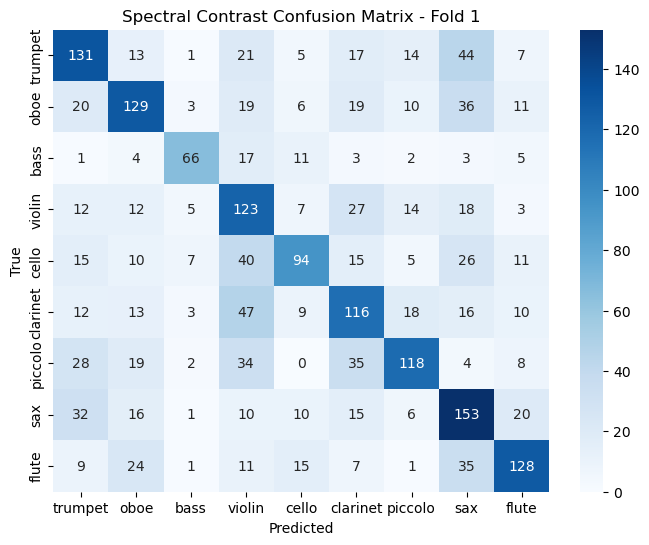

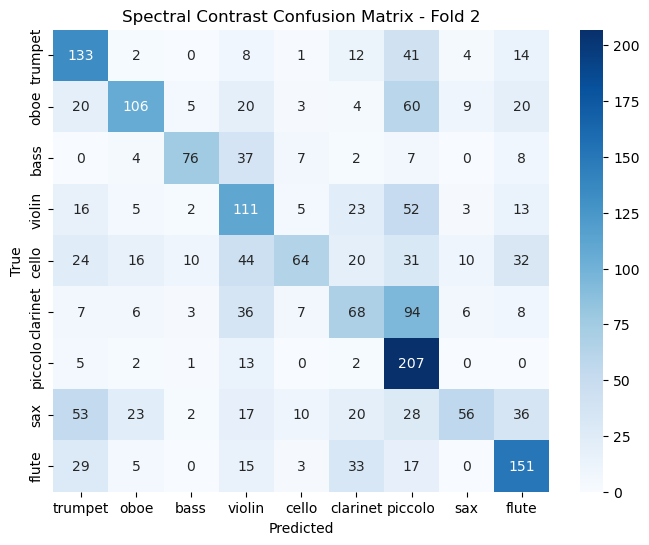

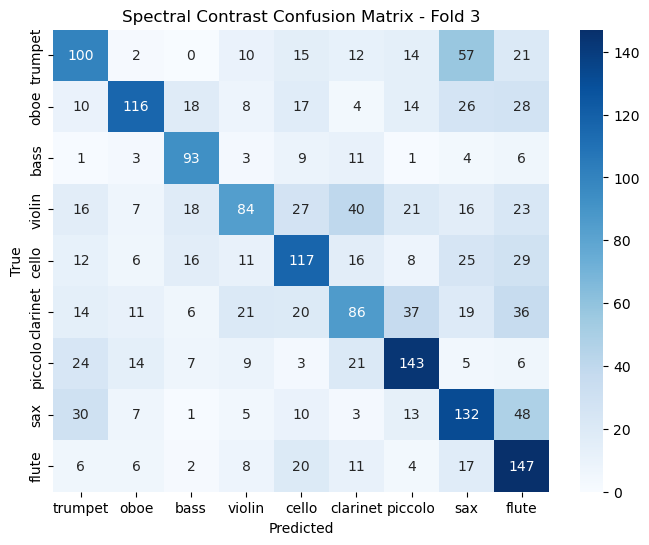

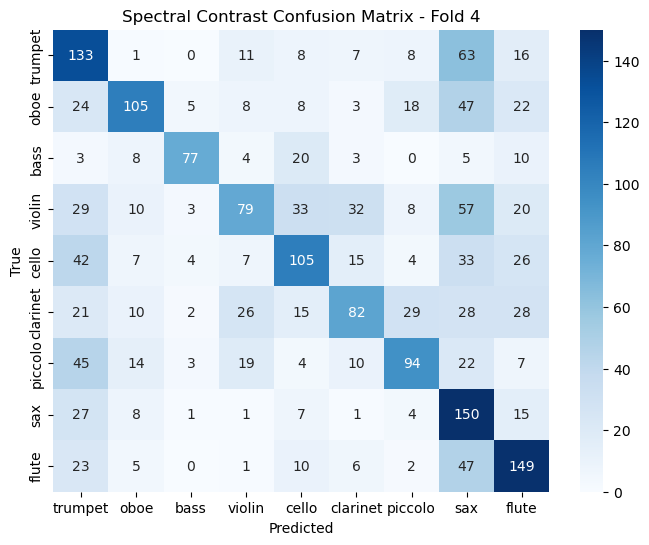

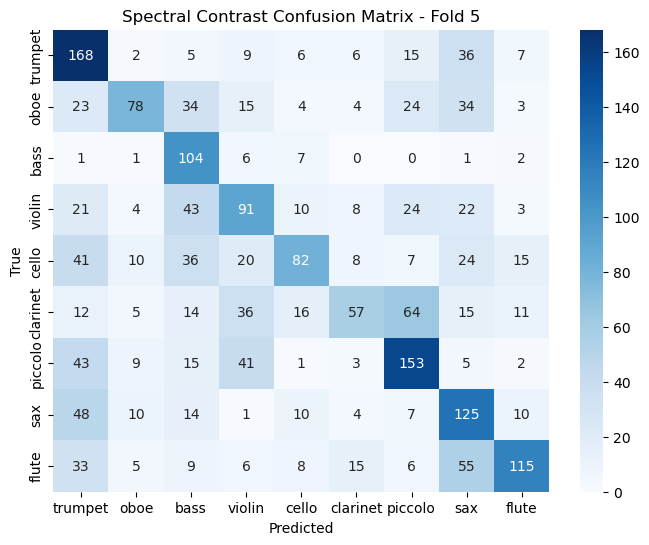


Tonnetz Model
Accuracies: [0.5263671875, 0.4914509057998657, 0.4851001501083374, 0.52173912525177, 0.4797264337539673]
Mean: 0.5009, Std: 0.0193, Min: 0.4797, Max: 0.5264


precision    recall  f1-score      support
trumpet        0.638462  0.656126  0.647173   253.000000
oboe           0.603376  0.565217  0.583673   253.000000
bass           0.635593  0.669643  0.652174   112.000000
violin         0.362069  0.380090  0.370861   221.000000
cello          0.381356  0.605381  0.467938   223.000000
clarinet       0.571429  0.524590  0.547009   244.000000
piccolo        0.434043  0.411290  0.422360   248.000000
sax            0.406977  0.266160  0.321839   263.000000
flute          0.810185  0.757576  0.782998   231.000000
accuracy       0.526367  0.526367  0.526367     0.526367
macro avg      0.538165  0.537342  0.532892  2048.000000
weighted avg   0.533052  0.526367  0.524653  2048.000000

precision    recall  f1-score      support
trumpet        0.505190  0.679070  0.579365   215.000000
oboe           0.451515  0.603239  0.516464   247.000000
bass           0.640777  0.468085  0.540984   141.000000
violin         0.345550  0.286957  0.313539   230.000000
cello          0.476000  0.474104  0.475050   251.000000
clarinet       0.476190  0.468085  0.472103   235.000000
piccolo        0.486772  0.400000  0.439141   230.000000
sax            0.356098  0.297959  0.324444   245.000000
flute          0.714286  0.731225  0.722656   253.000000
accuracy       0.491451  0.491451  0.491451     0.491451
macro avg      0.494709  0.489858  0.487083  2047.000000
weighted avg   0.489137  0.491451  0.485602  2047.000000

precision    recall  f1-score    support
trumpet        0.745946  0.597403  0.663462   231.0000
oboe           0.508772  0.601660  0.551331   241.0000
bass           0.472727  0.396947  0.431535   131.0000
violin         0.448485  0.293651  0.354916   252.0000
cello          0.437500  0.437500  0.437500   240.0000
clarinet       0.346734  0.552000  0.425926   250.0000
piccolo        0.508108  0.405172  0.450839   232.0000
sax            0.343023  0.236948  0.280285   249.0000
flute          0.612378  0.850679  0.712121   221.0000
accuracy       0.485100  0.485100  0.485100     0.4851
macro avg      0.491519  0.485773  0.478657  2047.0000
weighted avg   0.488611  0.485100  0.476476  2047.0000

precision    recall  f1-score      support
trumpet        0.581699  0.720648  0.643761   247.000000
oboe           0.523636  0.600000  0.559223   240.000000
bass           0.603960  0.469231  0.528139   130.000000
violin         0.516484  0.346863  0.415011   271.000000
cello          0.396739  0.600823  0.477905   243.000000
clarinet       0.486667  0.605809  0.539741   241.000000
piccolo        0.479167  0.316514  0.381215   218.000000
sax            0.319444  0.214953  0.256983   214.000000
flute          0.810573  0.757202  0.782979   243.000000
accuracy       0.521739  0.521739  0.521739     0.521739
macro avg      0.524263  0.514671  0.509440  2047.000000
weighted avg   0.523360  0.521739  0.512418  2047.000000

precision    recall  f1-score      support
trumpet        0.568905  0.633858  0.599628   254.000000
oboe           0.418367  0.561644  0.479532   219.000000
bass           0.628571  0.360656  0.458333   122.000000
violin         0.378531  0.296460  0.332506   226.000000
cello          0.465116  0.493827  0.479042   243.000000
clarinet       0.431655  0.521739  0.472441   230.000000
piccolo        0.386617  0.382353  0.384473   272.000000
sax            0.335227  0.257642  0.291358   229.000000
flute          0.760331  0.730159  0.744939   252.000000
accuracy       0.479726  0.479726  0.479726     0.479726
macro avg      0.485924  0.470926  0.471361  2047.000000
weighted avg   0.480797  0.479726  0.475074  2047.000000

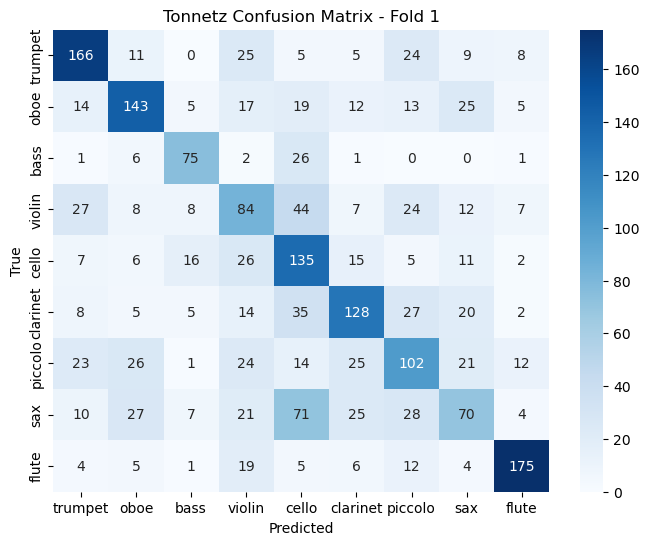

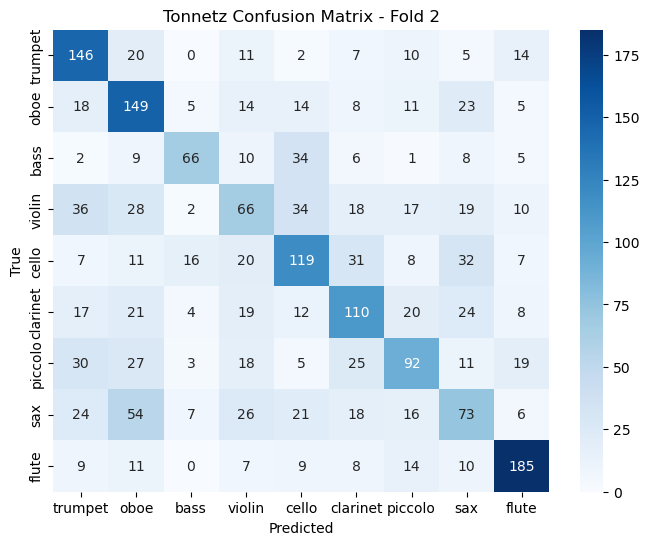

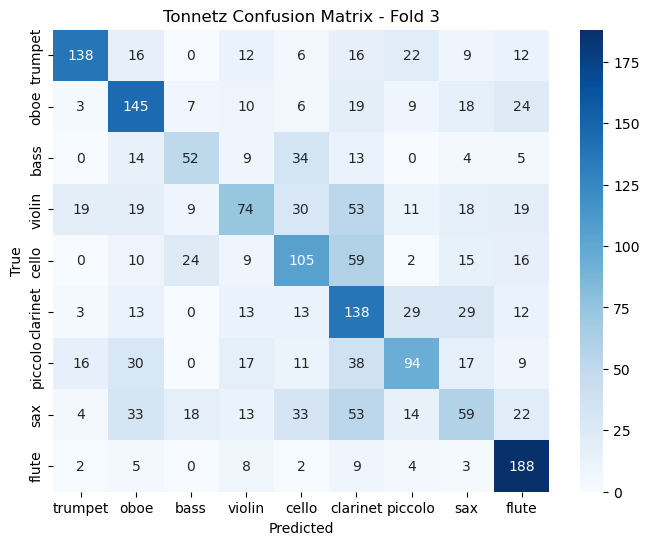

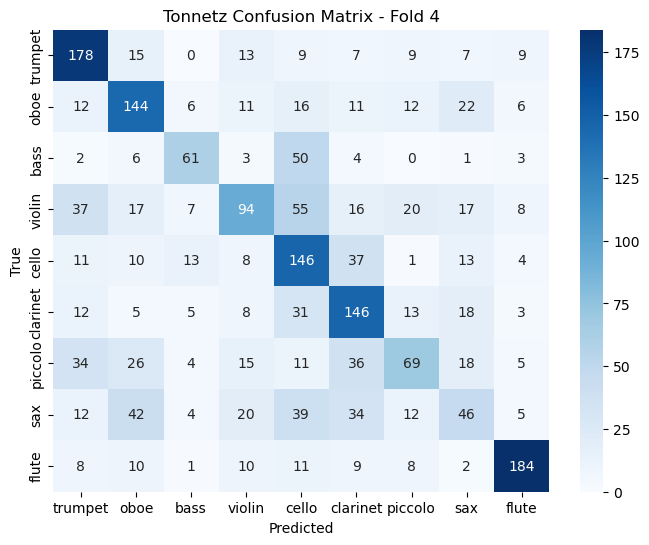

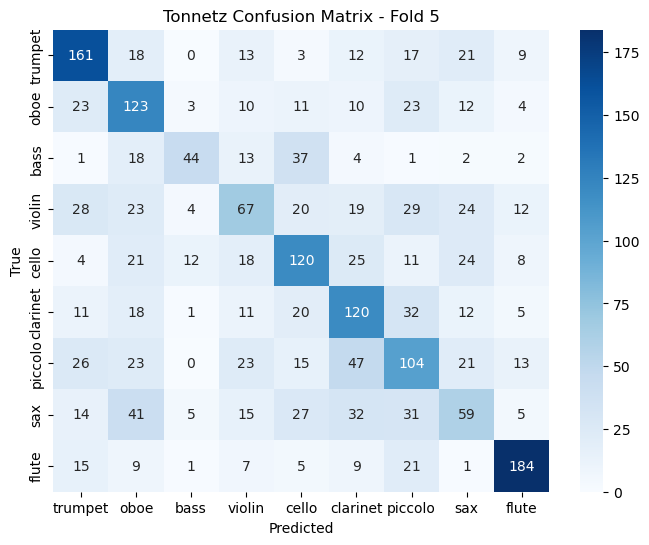


Constant Q Model
Accuracies: [0.91845703125, 0.9355154037475586, 0.9027845859527588, 0.913532018661499, 0.9330728054046631]
Mean: 0.9207, Std: 0.0122, Min: 0.9028, Max: 0.9355


precision    recall  f1-score      support
trumpet        0.856031  0.869565  0.862745   253.000000
oboe           0.904382  0.897233  0.900794   253.000000
bass           0.947826  0.973214  0.960352   112.000000
violin         0.968182  0.963801  0.965986   221.000000
cello          0.981651  0.959641  0.970522   223.000000
clarinet       0.872428  0.868852  0.870637   244.000000
piccolo        0.925000  0.895161  0.909836   248.000000
sax            0.912879  0.916350  0.914611   263.000000
flute          0.929167  0.965368  0.946921   231.000000
accuracy       0.918457  0.918457  0.918457     0.918457
macro avg      0.921950  0.923243  0.922489  2048.000000
weighted avg   0.918659  0.918457  0.918457  2048.000000

precision    recall  f1-score      support
trumpet        0.902222  0.944186  0.922727   215.000000
oboe           0.938865  0.870445  0.903361   247.000000
bass           0.985816  0.985816  0.985816   141.000000
violin         0.961864  0.986957  0.974249   230.000000
cello          0.987603  0.952191  0.969574   251.000000
clarinet       0.870968  0.919149  0.894410   235.000000
piccolo        0.927928  0.895652  0.911504   230.000000
sax            0.922449  0.922449  0.922449   245.000000
flute          0.942085  0.964427  0.953125   253.000000
accuracy       0.935515  0.935515  0.935515     0.935515
macro avg      0.937756  0.937919  0.937468  2047.000000
weighted avg   0.936220  0.935515  0.935481  2047.000000

precision    recall  f1-score      support
trumpet        0.811245  0.874459  0.841667   231.000000
oboe           0.945701  0.867220  0.904762   241.000000
bass           0.921986  0.992366  0.955882   131.000000
violin         0.945525  0.964286  0.954813   252.000000
cello          0.972603  0.887500  0.928105   240.000000
clarinet       0.856589  0.884000  0.870079   250.000000
piccolo        0.900862  0.900862  0.900862   232.000000
sax            0.895582  0.895582  0.895582   249.000000
flute          0.895928  0.895928  0.895928   221.000000
accuracy       0.902785  0.902785  0.902785     0.902785
macro avg      0.905113  0.906911  0.905298  2047.000000
weighted avg   0.904707  0.902785  0.903063  2047.000000

precision    recall  f1-score      support
trumpet        0.887967  0.866397  0.877049   247.000000
oboe           0.895582  0.929167  0.912065   240.000000
bass           0.977444  1.000000  0.988593   130.000000
violin         0.980769  0.940959  0.960452   271.000000
cello          0.986957  0.934156  0.959831   243.000000
clarinet       0.849372  0.842324  0.845833   241.000000
piccolo        0.862069  0.917431  0.888889   218.000000
sax            0.888372  0.892523  0.890443   214.000000
flute          0.915323  0.934156  0.924644   243.000000
accuracy       0.913532  0.913532  0.913532     0.913532
macro avg      0.915984  0.917457  0.916422  2047.000000
weighted avg   0.914567  0.913532  0.913743  2047.000000

precision    recall  f1-score      support
trumpet        0.908000  0.893701  0.900794   254.000000
oboe           0.925581  0.908676  0.917051   219.000000
bass           0.991597  0.967213  0.979253   122.000000
violin         0.981982  0.964602  0.973214   226.000000
cello          0.963265  0.971193  0.967213   243.000000
clarinet       0.900862  0.908696  0.904762   230.000000
piccolo        0.944649  0.941176  0.942910   272.000000
sax            0.932432  0.903930  0.917960   229.000000
flute          0.885609  0.952381  0.917782   252.000000
accuracy       0.933073  0.933073  0.933073     0.933073
macro avg      0.937109  0.934619  0.935660  2047.000000
weighted avg   0.933636  0.933073  0.933143  2047.000000

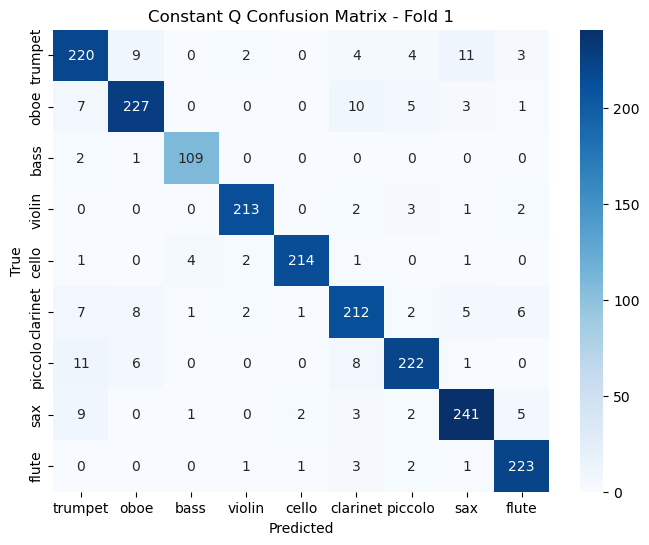

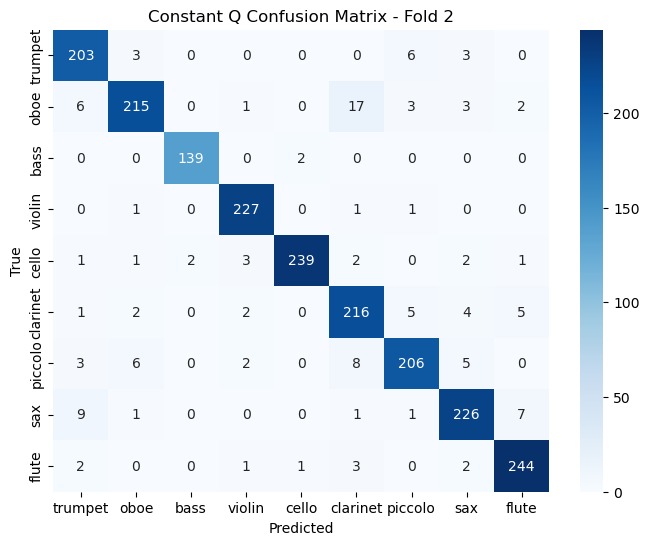

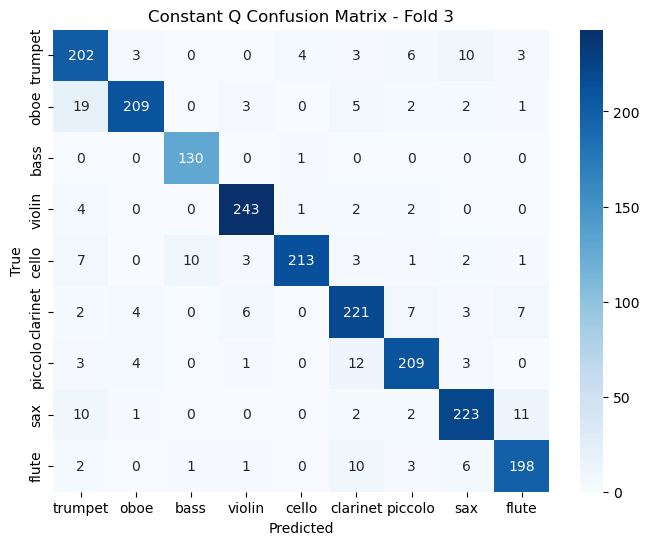

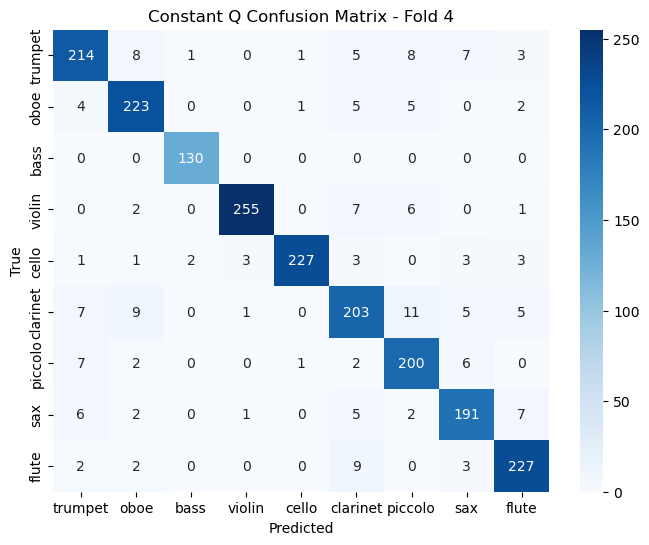

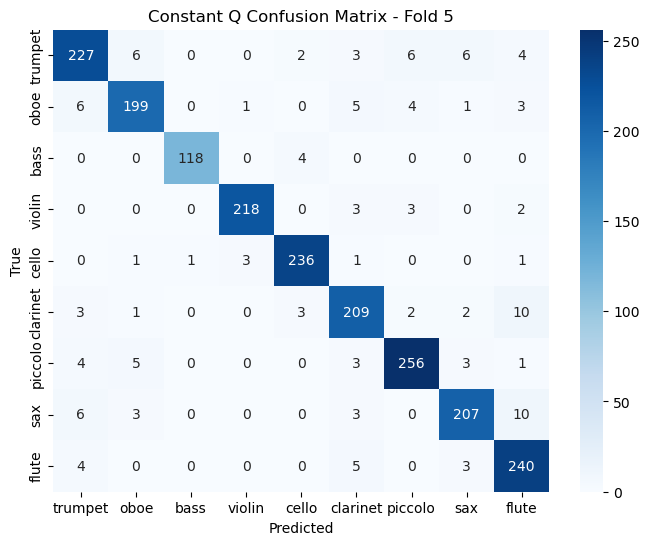


Stft Model
Accuracies: [0.822265625, 0.8270639777183533, 0.84513920545578, 0.8045920729637146, 0.8280410170555115]
Mean: 0.8254, Std: 0.0130, Min: 0.8046, Max: 0.8451


precision    recall  f1-score      support
trumpet        0.896861  0.790514  0.840336   253.000000
oboe           0.805054  0.881423  0.841509   253.000000
bass           0.757143  0.946429  0.841270   112.000000
violin         0.682759  0.895928  0.774951   221.000000
cello          0.787037  0.762332  0.774487   223.000000
clarinet       0.841121  0.737705  0.786026   244.000000
piccolo        0.857143  0.798387  0.826722   248.000000
sax            0.919492  0.825095  0.869739   263.000000
flute          0.868778  0.831169  0.849558   231.000000
accuracy       0.822266  0.822266  0.822266     0.822266
macro avg      0.823932  0.829887  0.822733  2048.000000
weighted avg   0.831105  0.822266  0.823003  2048.000000

precision    recall  f1-score      support
trumpet        0.893617  0.781395  0.833747   215.000000
oboe           0.892857  0.809717  0.849257   247.000000
bass           0.850649  0.929078  0.888136   141.000000
violin         0.791855  0.760870  0.776053   230.000000
cello          0.828685  0.828685  0.828685   251.000000
clarinet       0.750000  0.765957  0.757895   235.000000
piccolo        0.715827  0.865217  0.783465   230.000000
sax            0.929245  0.804082  0.862144   245.000000
flute          0.842294  0.928854  0.883459   253.000000
accuracy       0.827064  0.827064  0.827064     0.827064
macro avg      0.832781  0.830428  0.829204  2047.000000
weighted avg   0.832627  0.827064  0.827447  2047.000000

precision    recall  f1-score      support
trumpet        0.870192  0.783550  0.824601   231.000000
oboe           0.788679  0.867220  0.826087   241.000000
bass           0.952000  0.908397  0.929688   131.000000
violin         0.857692  0.884921  0.871094   252.000000
cello          0.905830  0.841667  0.872570   240.000000
clarinet       0.807531  0.772000  0.789366   250.000000
piccolo        0.785714  0.853448  0.818182   232.000000
sax            0.848249  0.875502  0.861660   249.000000
flute          0.857798  0.846154  0.851936   221.000000
accuracy       0.845139  0.845139  0.845139     0.845139
macro avg      0.852632  0.848095  0.849465  2047.000000
weighted avg   0.847236  0.845139  0.845277  2047.000000

precision    recall  f1-score      support
trumpet        0.921951  0.765182  0.836283   247.000000
oboe           0.886463  0.845833  0.865672   240.000000
bass           0.955752  0.830769  0.888889   130.000000
violin         0.770270  0.841328  0.804233   271.000000
cello          0.686469  0.855967  0.761905   243.000000
clarinet       0.722222  0.701245  0.711579   241.000000
piccolo        0.734940  0.839450  0.783726   218.000000
sax            0.815000  0.761682  0.787440   214.000000
flute          0.899083  0.806584  0.850325   243.000000
accuracy       0.804592  0.804592  0.804592     0.804592
macro avg      0.821350  0.805338  0.810006  2047.000000
weighted avg   0.814575  0.804592  0.806279  2047.000000

precision    recall  f1-score      support
trumpet        0.853755  0.850394  0.852071   254.000000
oboe           0.783673  0.876712  0.827586   219.000000
bass           0.932203  0.901639  0.916667   122.000000
violin         0.822727  0.800885  0.811659   226.000000
cello          0.789883  0.835391  0.812000   243.000000
clarinet       0.799087  0.760870  0.779510   230.000000
piccolo        0.803509  0.841912  0.822262   272.000000
sax            0.851852  0.803493  0.826966   229.000000
flute          0.876068  0.813492  0.843621   252.000000
accuracy       0.828041  0.828041  0.828041     0.828041
macro avg      0.834751  0.831643  0.832483  2047.000000
weighted avg   0.829640  0.828041  0.828120  2047.000000

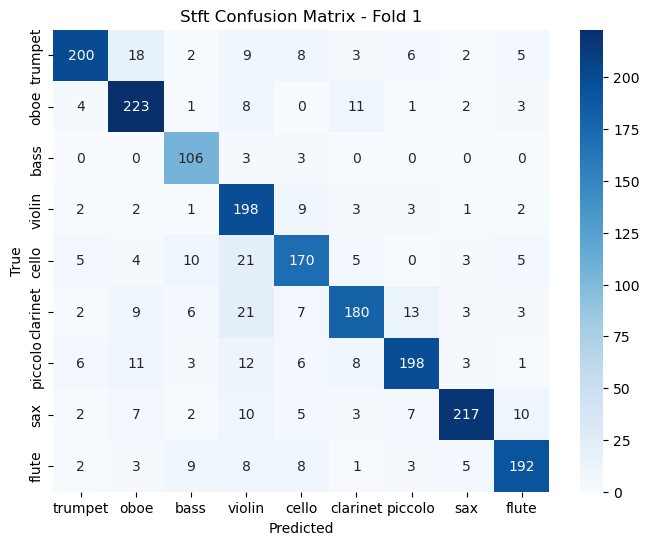

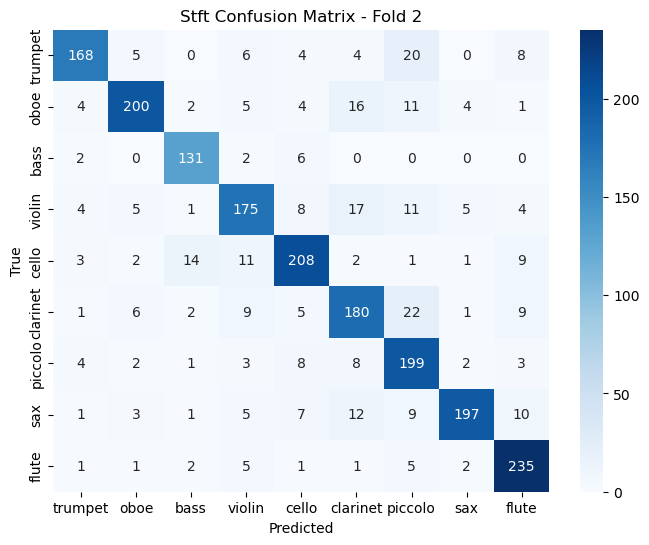

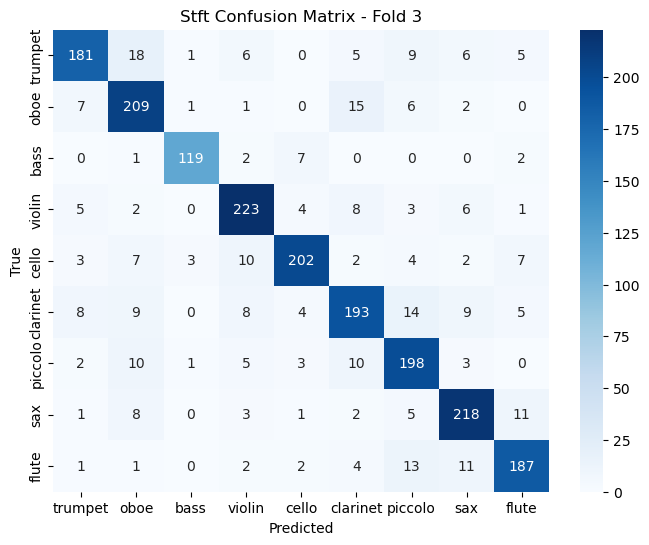

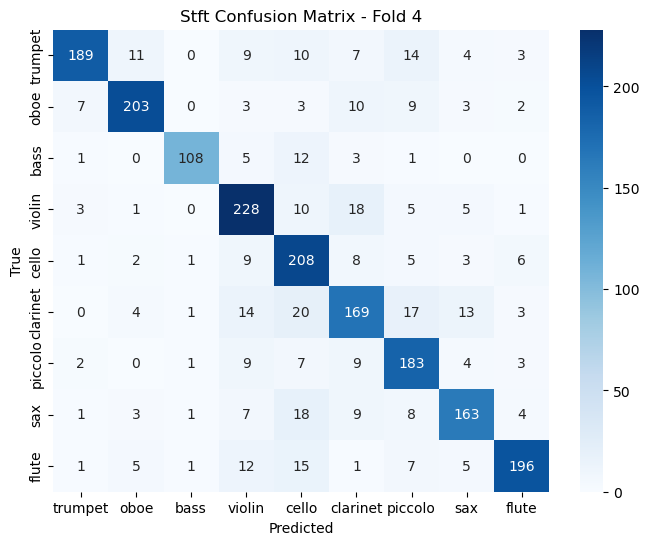

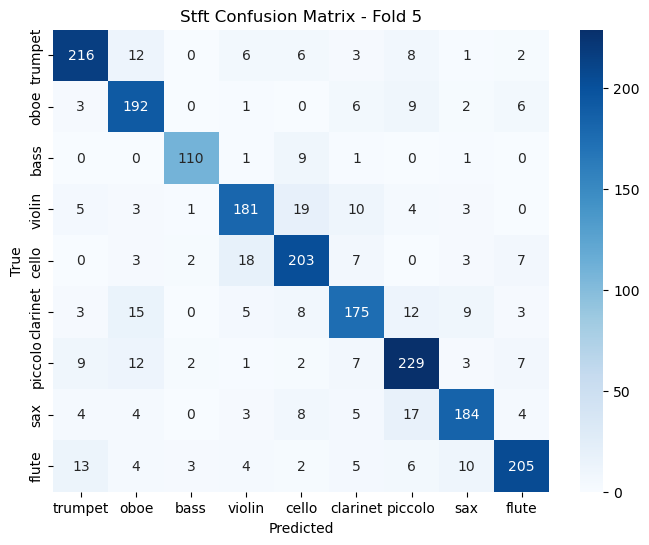


Harmonic Percussive Model
Accuracies: [0.94482421875, 0.9364924430847168, 0.9579873085021973, 0.9443087577819824, 0.9491939544677734]
Mean: 0.9466, Std: 0.0070, Min: 0.9365, Max: 0.9580


precision    recall  f1-score      support
trumpet        0.971774  0.952569  0.962076   253.000000
oboe           0.938525  0.905138  0.921529   253.000000
bass           1.000000  0.928571  0.962963   112.000000
violin         0.964912  0.995475  0.979955   221.000000
cello          0.985782  0.932735  0.958525   223.000000
clarinet       0.879377  0.926230  0.902196   244.000000
piccolo        0.951220  0.943548  0.947368   248.000000
sax            0.913669  0.965779  0.939002   263.000000
flute          0.943966  0.948052  0.946004   231.000000
accuracy       0.944824  0.944824  0.944824     0.944824
macro avg      0.949914  0.944233  0.946624  2048.000000
weighted avg   0.945899  0.944824  0.944967  2048.000000

precision    recall  f1-score      support
trumpet        0.994898  0.906977  0.948905   215.000000
oboe           0.950413  0.931174  0.940695   247.000000
bass           0.940000  1.000000  0.969072   141.000000
violin         0.976636  0.908696  0.941441   230.000000
cello          0.990698  0.848606  0.914163   251.000000
clarinet       0.799283  0.948936  0.867704   235.000000
piccolo        0.921488  0.969565  0.944915   230.000000
sax            0.948207  0.971429  0.959677   245.000000
flute          0.949612  0.968379  0.958904   253.000000
accuracy       0.936492  0.936492  0.936492     0.936492
macro avg      0.941248  0.939307  0.938386  2047.000000
weighted avg   0.941291  0.936492  0.936960  2047.000000

precision    recall  f1-score      support
trumpet        0.947826  0.943723  0.945770   231.000000
oboe           0.939516  0.966805  0.952965   241.000000
bass           0.983871  0.931298  0.956863   131.000000
violin         0.984127  0.984127  0.984127   252.000000
cello          0.974249  0.945833  0.959831   240.000000
clarinet       0.916996  0.928000  0.922465   250.000000
piccolo        0.969828  0.969828  0.969828   232.000000
sax            0.987854  0.979920  0.983871   249.000000
flute          0.929825  0.959276  0.944321   221.000000
accuracy       0.957987  0.957987  0.957987     0.957987
macro avg      0.959344  0.956534  0.957782  2047.000000
weighted avg   0.958375  0.957987  0.958056  2047.000000

precision    recall  f1-score      support
trumpet        0.961373  0.906883  0.933333   247.000000
oboe           0.977778  0.916667  0.946237   240.000000
bass           1.000000  0.961538  0.980392   130.000000
violin         0.981685  0.988930  0.985294   271.000000
cello          0.965517  0.921811  0.943158   243.000000
clarinet       0.937778  0.875519  0.905579   241.000000
piccolo        0.857143  0.990826  0.919149   218.000000
sax            0.966825  0.953271  0.960000   214.000000
flute          0.889299  0.991770  0.937743   243.000000
accuracy       0.944309  0.944309  0.944309     0.944309
macro avg      0.948600  0.945246  0.945654  2047.000000
weighted avg   0.947066  0.944309  0.944413  2047.000000

precision    recall  f1-score      support
trumpet        0.915441  0.980315  0.946768   254.000000
oboe           0.970732  0.908676  0.938679   219.000000
bass           0.991597  0.967213  0.979253   122.000000
violin         0.918033  0.991150  0.953191   226.000000
cello          0.958506  0.950617  0.954545   243.000000
clarinet       0.940367  0.891304  0.915179   230.000000
piccolo        0.955390  0.944853  0.950092   272.000000
sax            0.951111  0.934498  0.942731   229.000000
flute          0.968504  0.976190  0.972332   252.000000
accuracy       0.949194  0.949194  0.949194     0.949194
macro avg      0.952187  0.949424  0.950308  2047.000000
weighted avg   0.949926  0.949194  0.949059  2047.000000

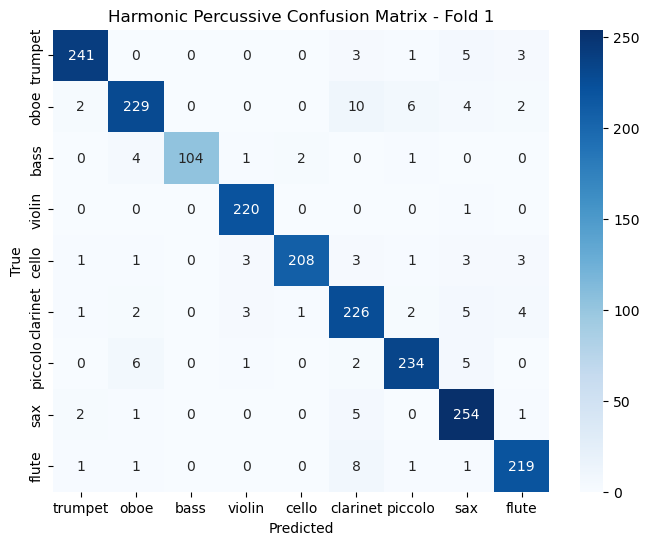

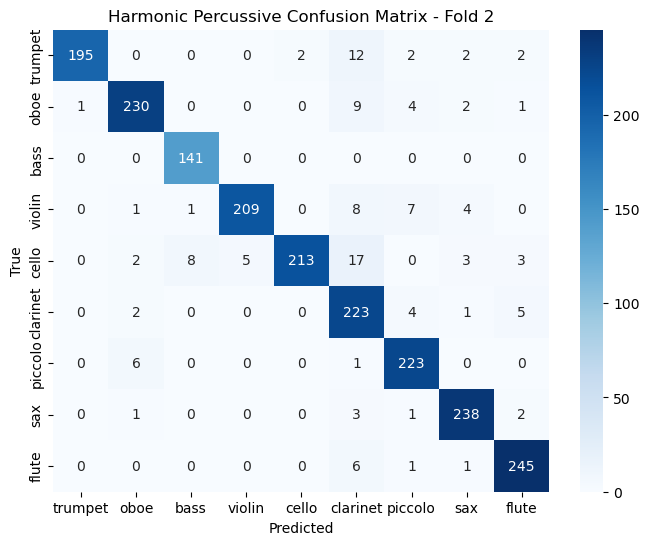

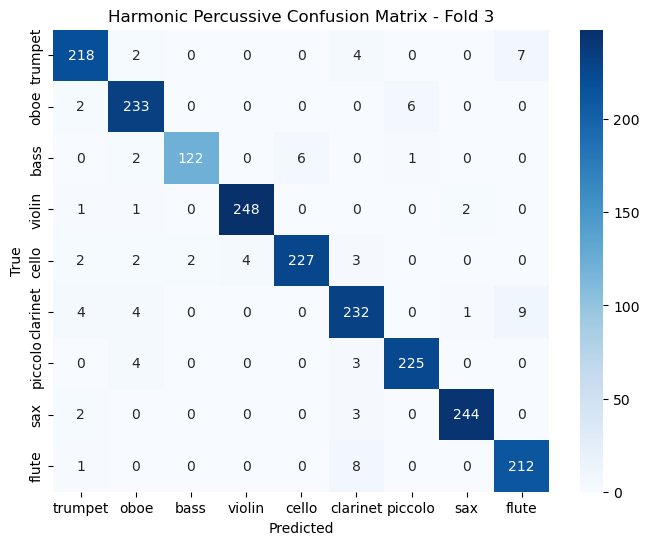

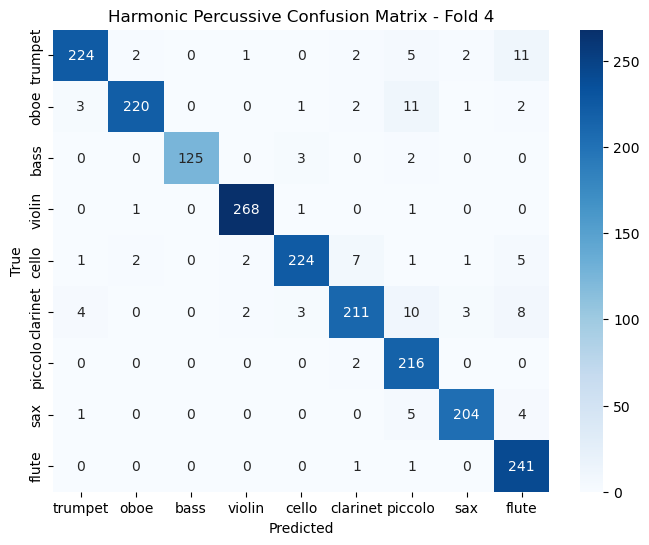

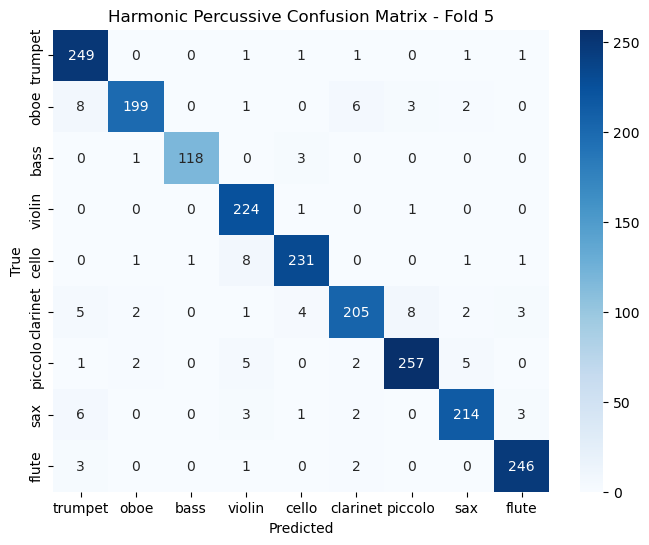


Onset Strength Model
Accuracies: [0.32080078125, 0.30337077379226685, 0.3238886296749115, 0.30532485246658325, 0.31118708848953247]
Mean: 0.3129, Std: 0.0082, Min: 0.3034, Max: 0.3239


precision    recall  f1-score      support
trumpet        0.329231  0.422925  0.370242   253.000000
oboe           0.362989  0.403162  0.382022   253.000000
bass           0.536082  0.464286  0.497608   112.000000
violin         0.503876  0.294118  0.371429   221.000000
cello          0.336842  0.143498  0.201258   223.000000
clarinet       0.269481  0.340164  0.300725   244.000000
piccolo        0.278027  0.250000  0.263270   248.000000
sax            0.222222  0.121673  0.157248   263.000000
flute          0.273543  0.528139  0.360414   231.000000
accuracy       0.320801  0.320801  0.320801     0.320801
macro avg      0.345810  0.329774  0.322691  2048.000000
weighted avg   0.331046  0.320801  0.310694  2048.000000

precision    recall  f1-score      support
trumpet        0.401274  0.293023  0.338710   215.000000
oboe           0.265125  0.603239  0.368356   247.000000
bass           0.561151  0.553191  0.557143   141.000000
violin         0.227147  0.356522  0.277496   230.000000
cello          0.275591  0.139442  0.185185   251.000000
clarinet       0.319549  0.361702  0.339321   235.000000
piccolo        0.282759  0.178261  0.218667   230.000000
sax            0.226994  0.151020  0.181373   245.000000
flute          0.401575  0.201581  0.268421   253.000000
accuracy       0.303371  0.303371  0.303371     0.303371
macro avg      0.329018  0.315331  0.303852  2047.000000
weighted avg   0.317362  0.303371  0.290694  2047.000000

precision    recall  f1-score      support
trumpet        0.331967  0.350649  0.341053   231.000000
oboe           0.359649  0.510373  0.421955   241.000000
bass           0.559055  0.541985  0.550388   131.000000
violin         0.311189  0.353175  0.330855   252.000000
cello          0.358333  0.179167  0.238889   240.000000
clarinet       0.271955  0.384000  0.318408   250.000000
piccolo        0.250000  0.172414  0.204082   232.000000
sax            0.262222  0.236948  0.248945   249.000000
flute          0.321053  0.276018  0.296837   221.000000
accuracy       0.323889  0.323889  0.323889     0.323889
macro avg      0.336158  0.333859  0.327935  2047.000000
weighted avg   0.324011  0.323889  0.316473  2047.000000

precision    recall  f1-score      support
trumpet        0.388889  0.425101  0.406190   247.000000
oboe           0.276596  0.541667  0.366197   240.000000
bass           0.559701  0.576923  0.568182   130.000000
violin         0.377622  0.199262  0.260870   271.000000
cello          0.312925  0.189300  0.235897   243.000000
clarinet       0.221591  0.323651  0.263069   241.000000
piccolo        0.220641  0.284404  0.248497   218.000000
sax            0.230769  0.182243  0.203655   214.000000
flute          0.444444  0.148148  0.222222   243.000000
accuracy       0.305325  0.305325  0.305325     0.305325
macro avg      0.337020  0.318967  0.308309  2047.000000
weighted avg   0.328512  0.305325  0.295678  2047.000000

precision    recall  f1-score      support
trumpet        0.401709  0.370079  0.385246   254.000000
oboe           0.404762  0.310502  0.351421   219.000000
bass           0.432258  0.549180  0.483755   122.000000
violin         0.296748  0.323009  0.309322   226.000000
cello          0.312500  0.226337  0.262530   243.000000
clarinet       0.214437  0.439130  0.288160   230.000000
piccolo        0.301370  0.161765  0.210526   272.000000
sax            0.239216  0.266376  0.252066   229.000000
flute          0.377551  0.293651  0.330357   252.000000
accuracy       0.311187  0.311187  0.311187     0.311187
macro avg      0.331172  0.326670  0.319265  2047.000000
weighted avg   0.326151  0.311187  0.308767  2047.000000

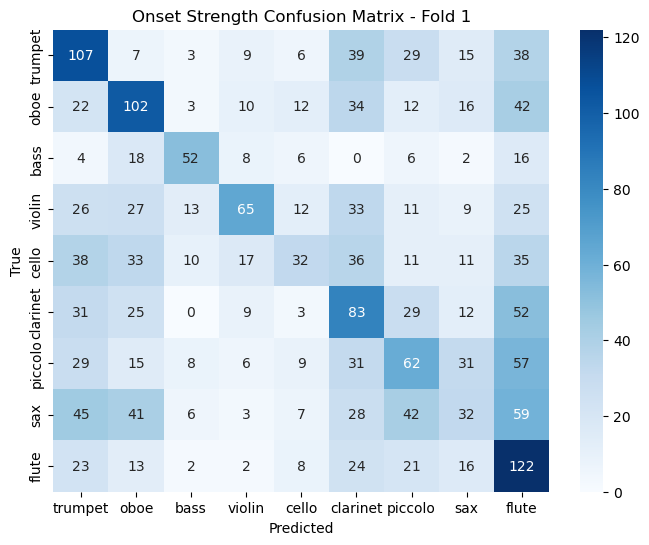

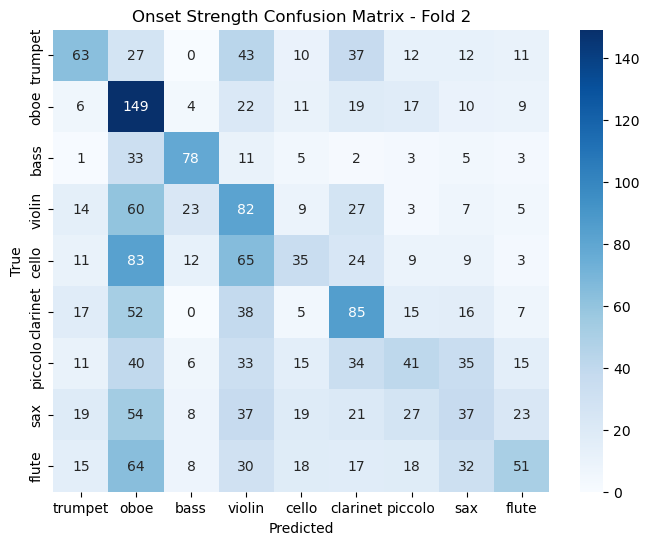

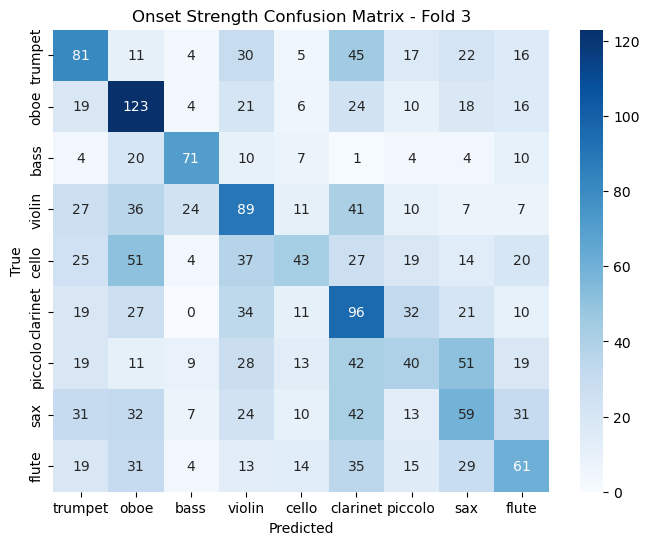

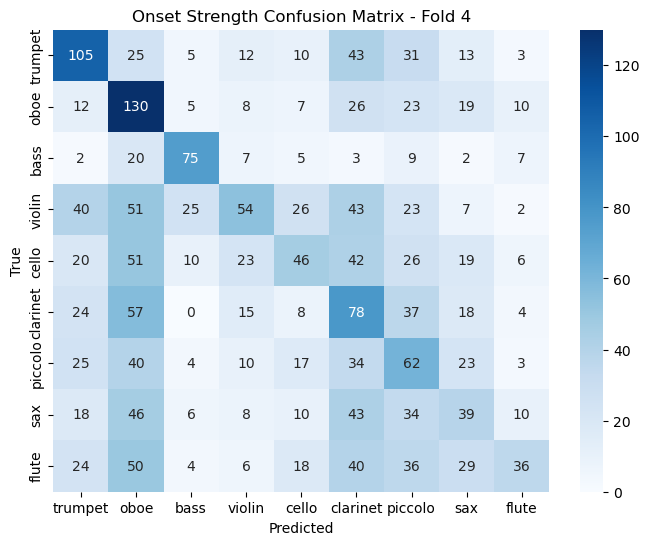

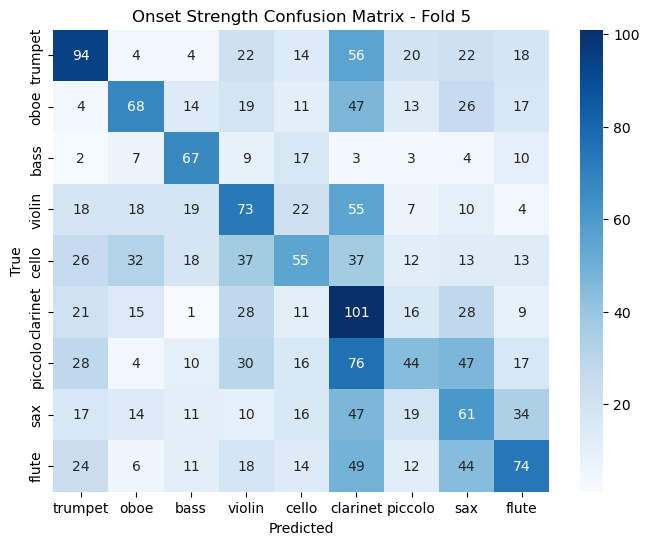

In [9]:
# Show detailed results for each feature type
for feature_type, results in individual_results.items():
    print(f"\n{'='*40}")
    print(f"{feature_type.replace('_', ' ').title()} Model")
    print(f"{'='*40}")
    accs = results['accuracy_list']
    print(f"Accuracies: {accs}")
    print(f"Mean: {np.mean(accs):.4f}, Std: {np.std(accs):.4f}, Min: {np.min(accs):.4f}, Max: {np.max(accs):.4f}")

    # Classification reports
    for i, report in enumerate(results['classification_reports']):
        df = pd.DataFrame(report).transpose()
        df.index = [class_names[int(idx)] if idx.isdigit() and int(idx) < len(class_names) else idx for idx in df.index]
        display(df)

    # Confusion matrices
    for i, conf_matrix in enumerate(results['confusion_matrices']):
        plt.figure(figsize=(8, 6))
        sns.heatmap(np.array(conf_matrix), annot=True, fmt="d", cmap="Blues",
                    xticklabels=class_names, yticklabels=class_names)
        plt.title(f"{feature_type.replace('_', ' ').title()} Confusion Matrix - Fold {i+1}")
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.show()

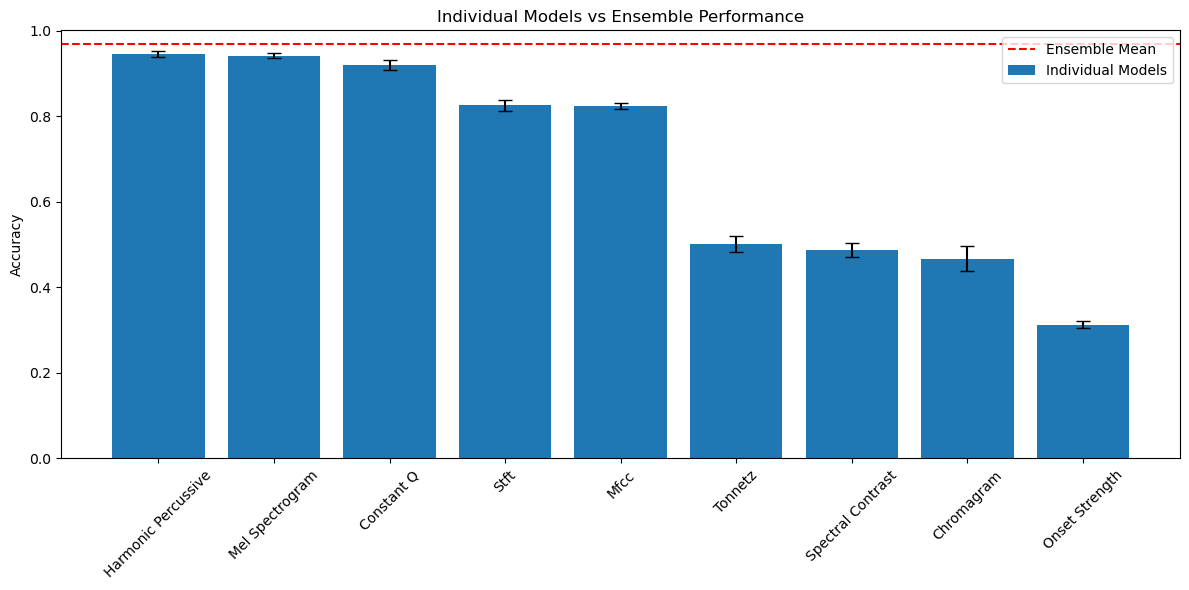

In [10]:
# Visual comparison of individual vs ensemble performance
plt.figure(figsize=(12, 6))
plt.bar(performance_df['Feature Type'], performance_df['Mean Accuracy'], yerr=performance_df['Std Accuracy'], capsize=5, label='Individual Models')
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Individual Models vs Ensemble Performance')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


Mel Spectrogram Training History


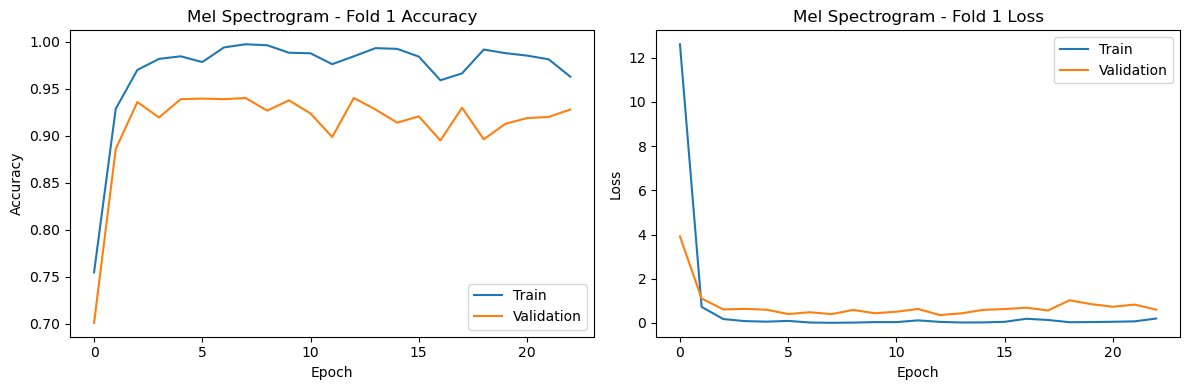

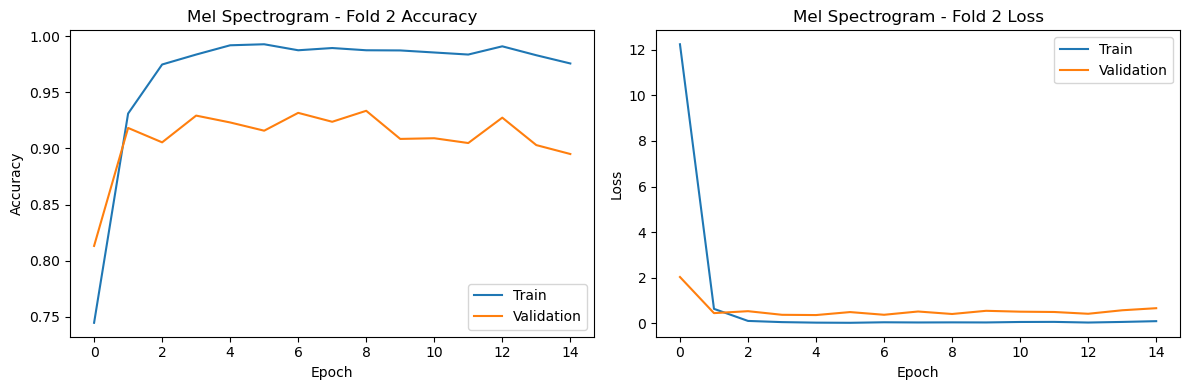

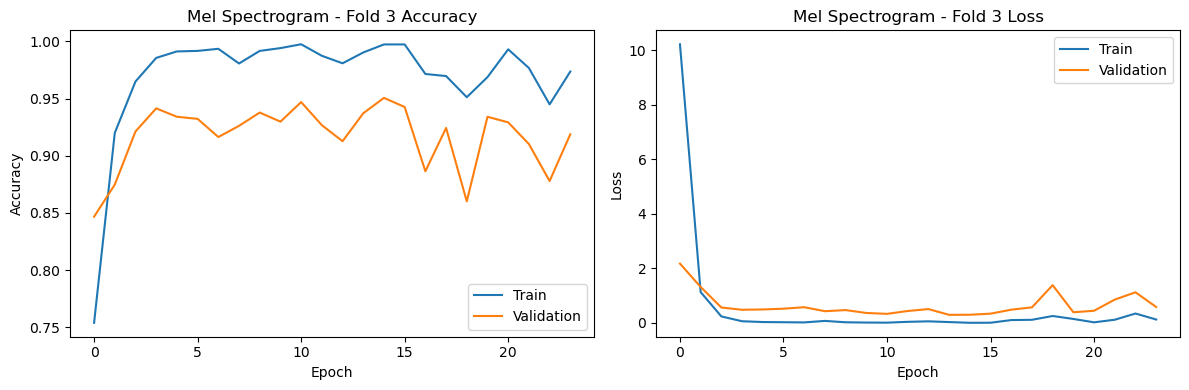

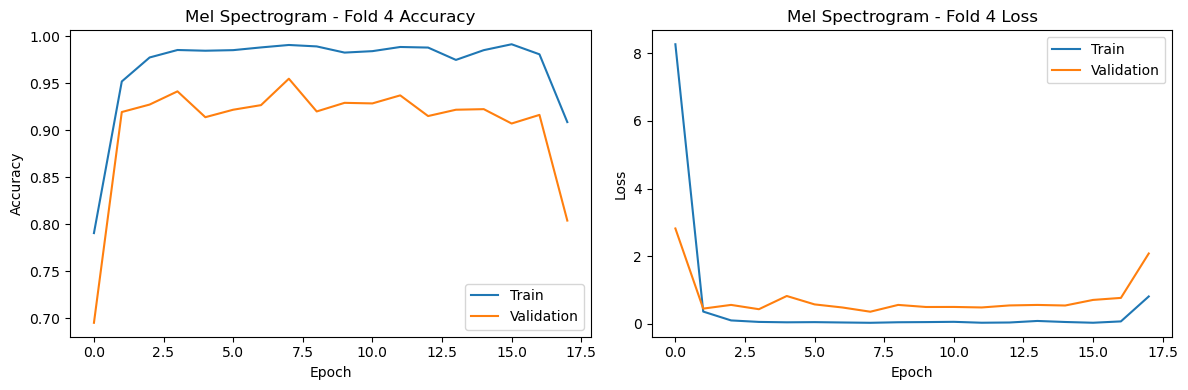

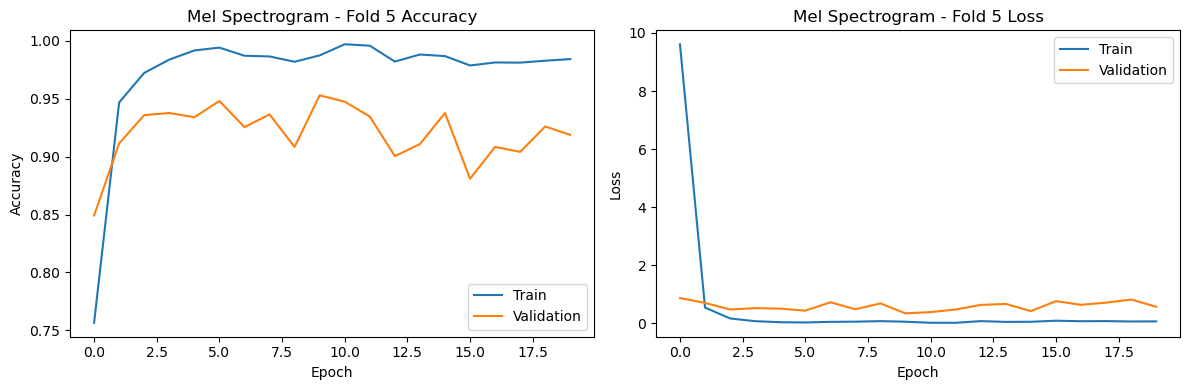


Mfcc Training History


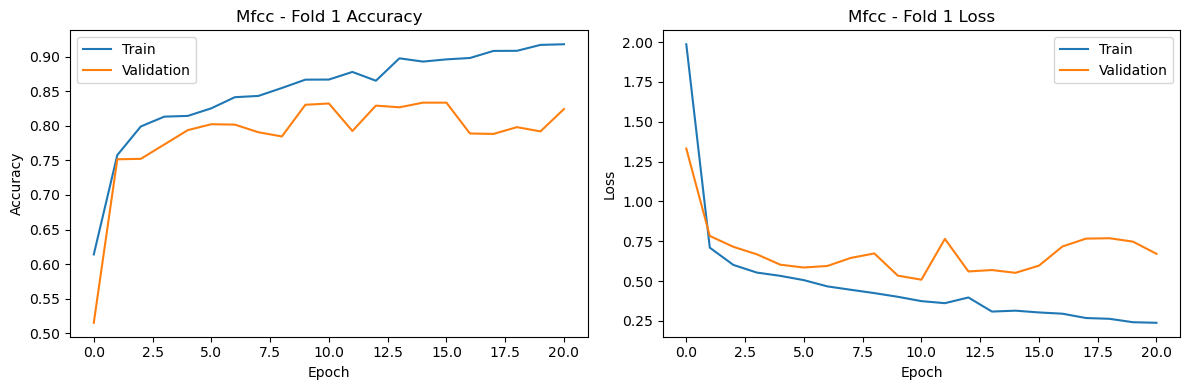

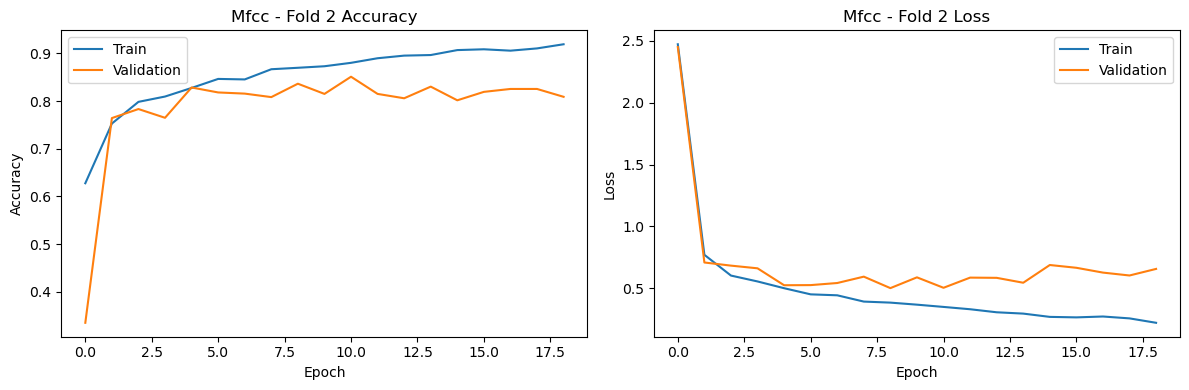

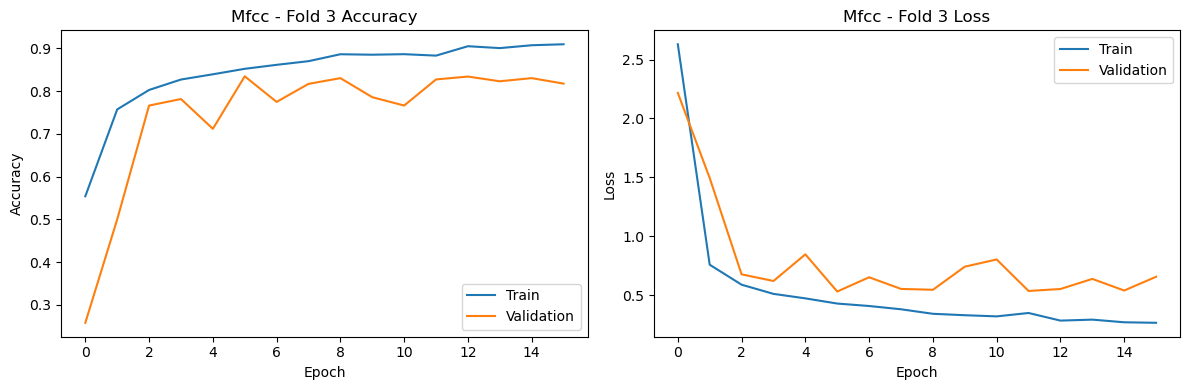

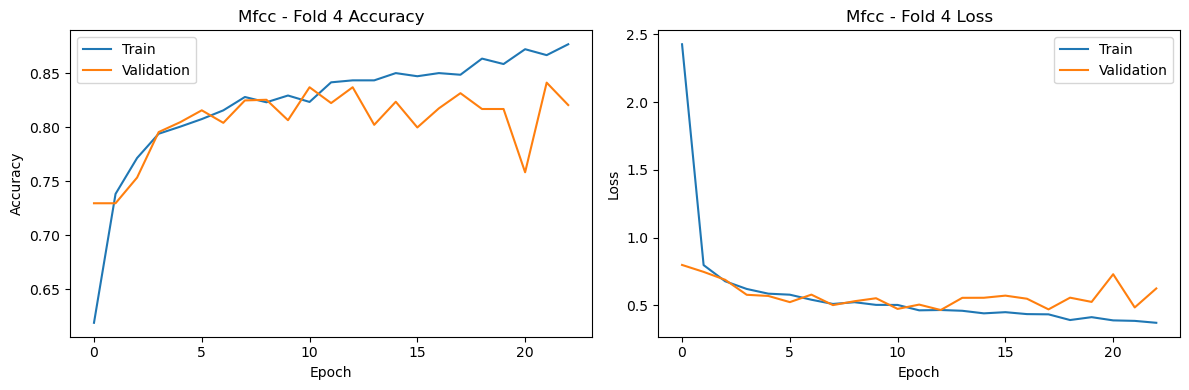

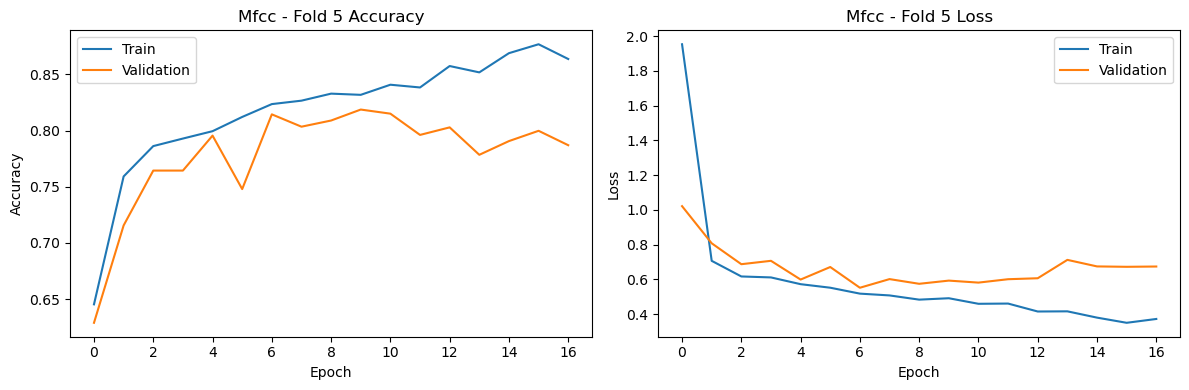


Chromagram Training History


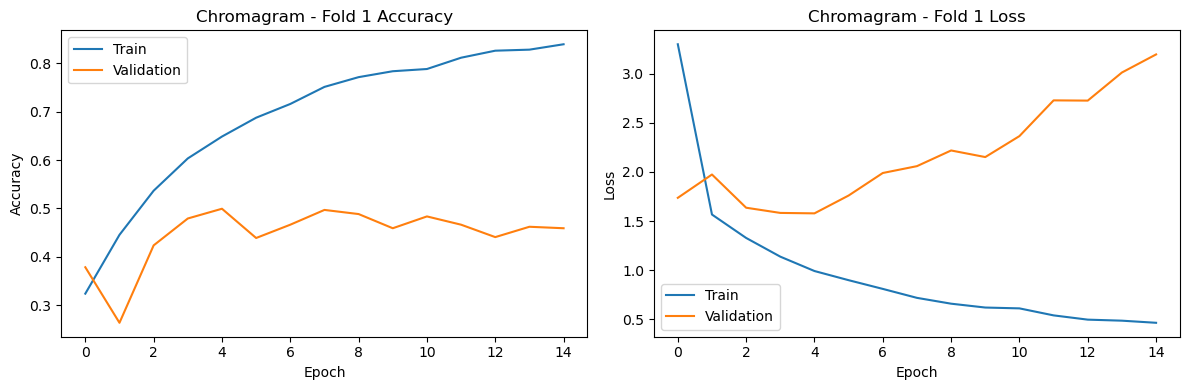

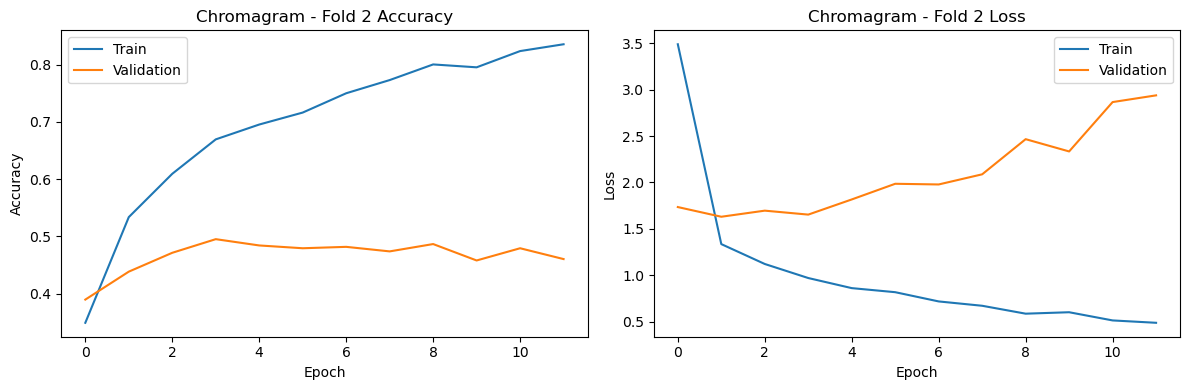

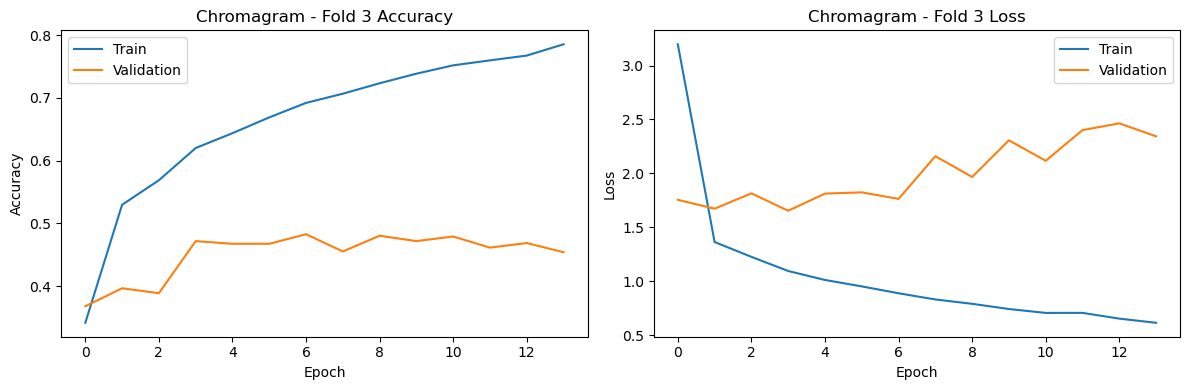

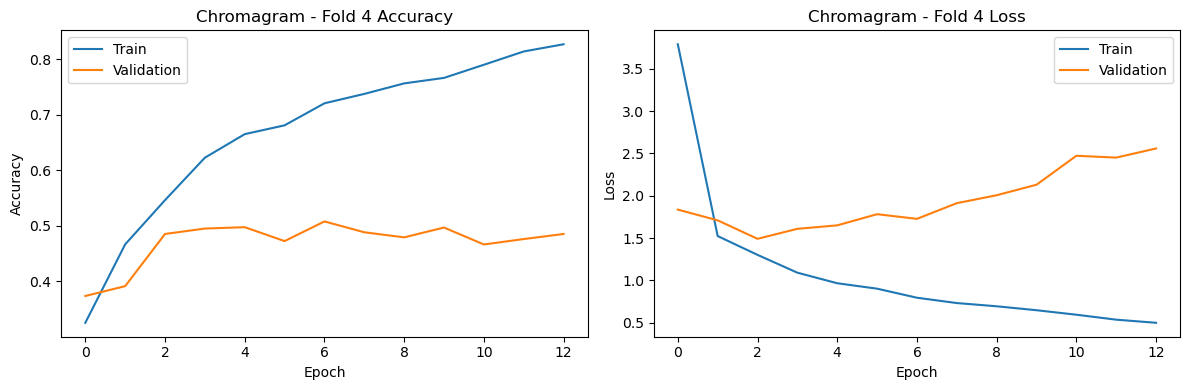

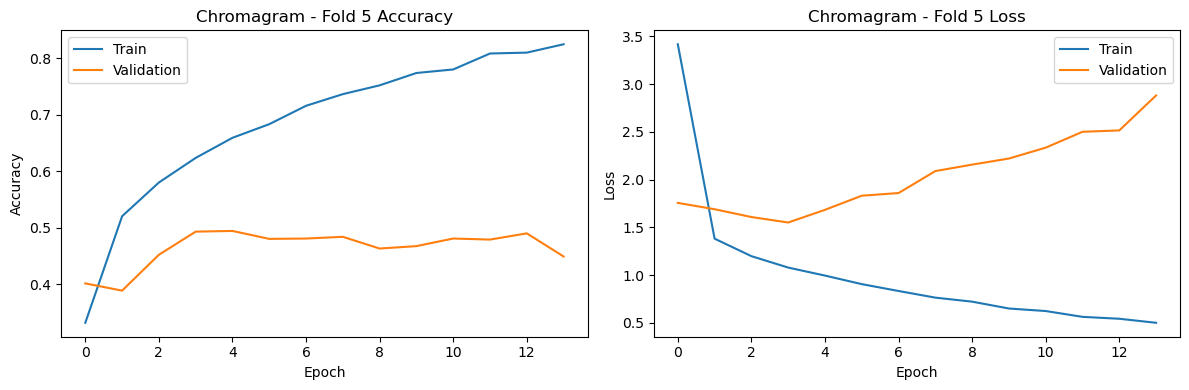


Spectral Contrast Training History


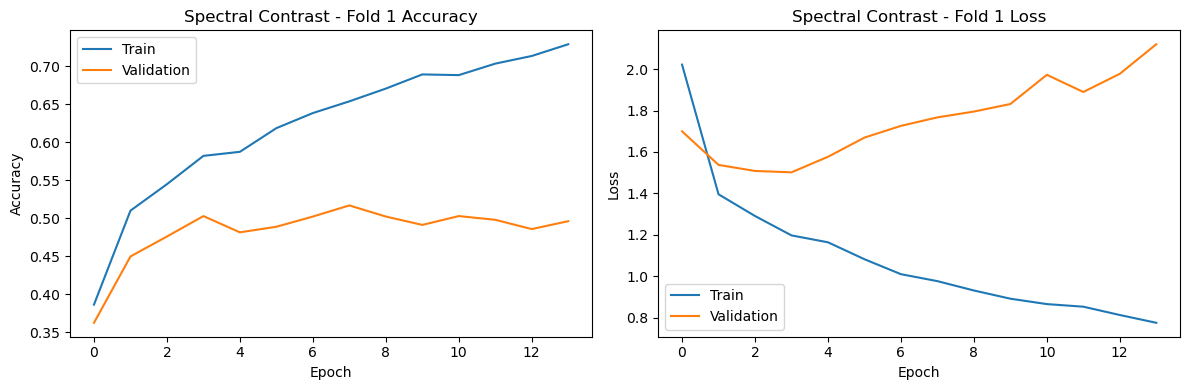

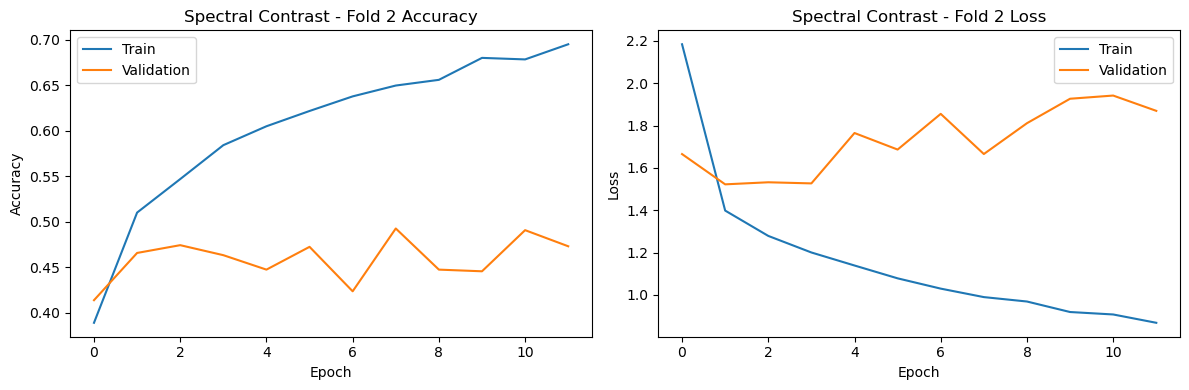

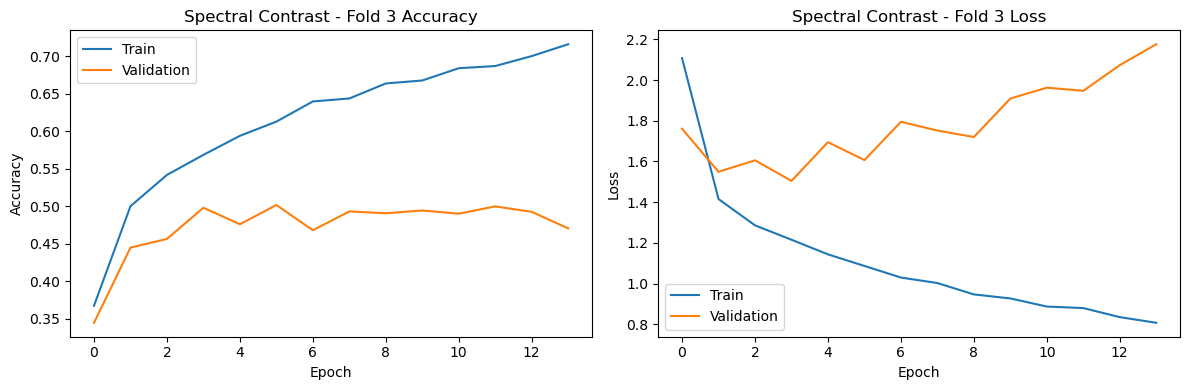

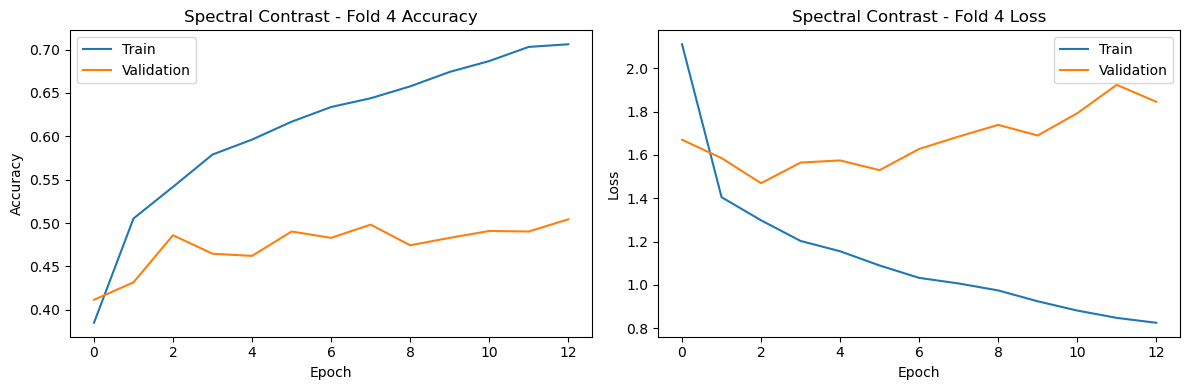

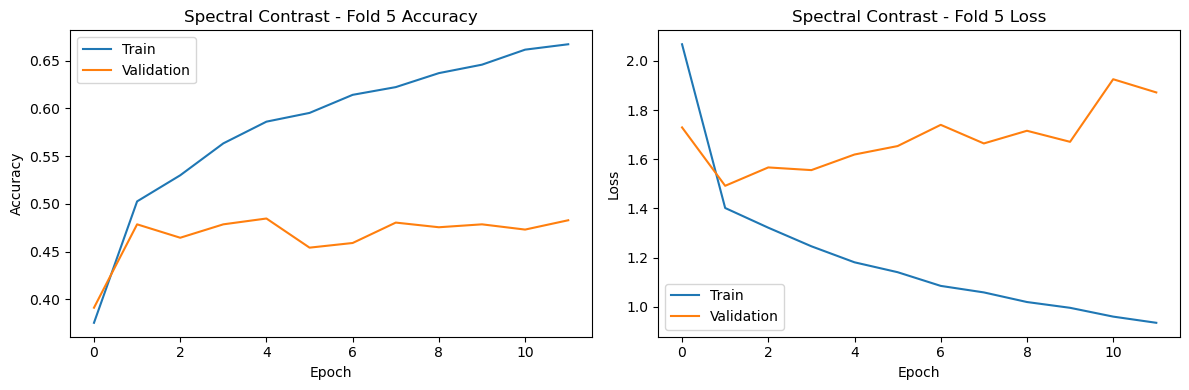


Tonnetz Training History


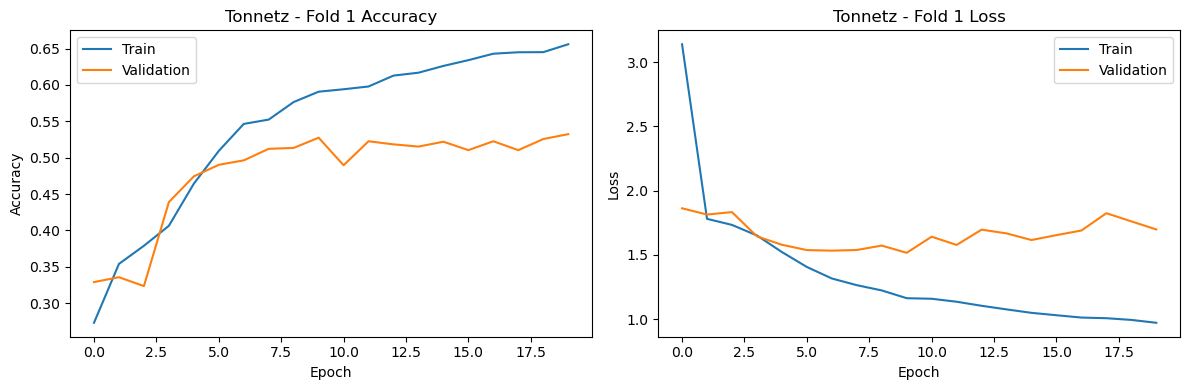

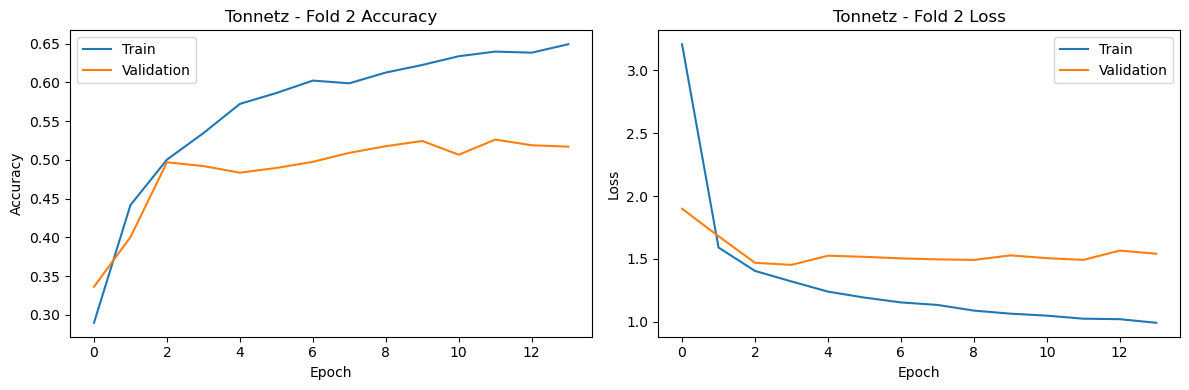

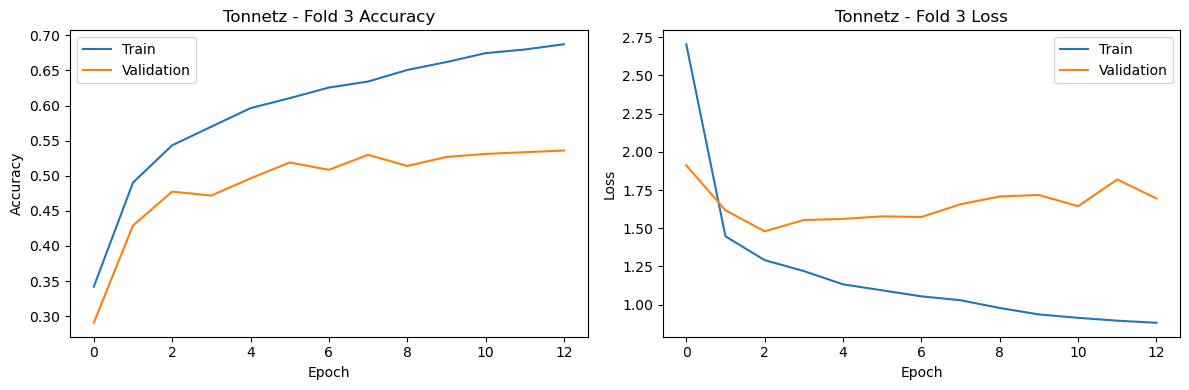

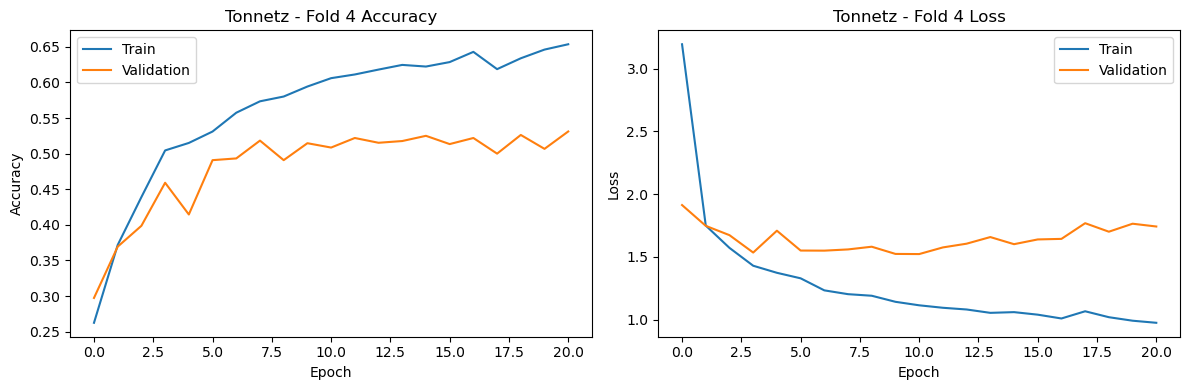

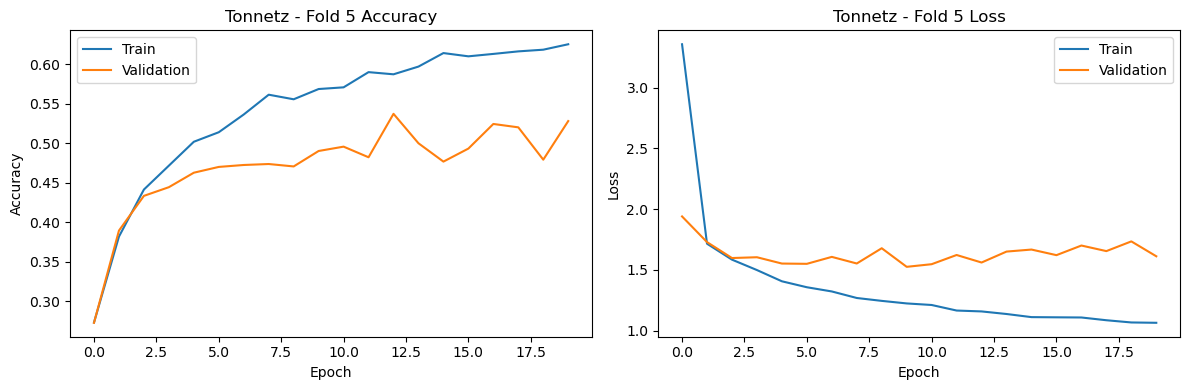


Constant Q Training History


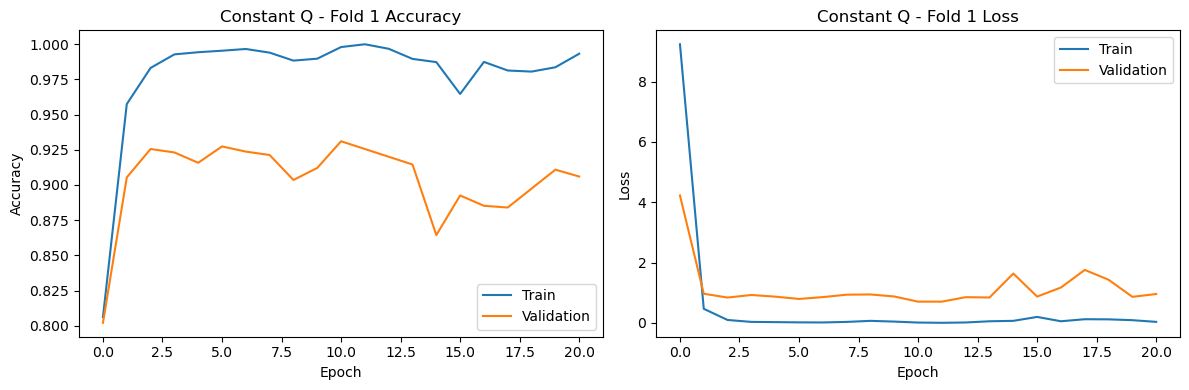

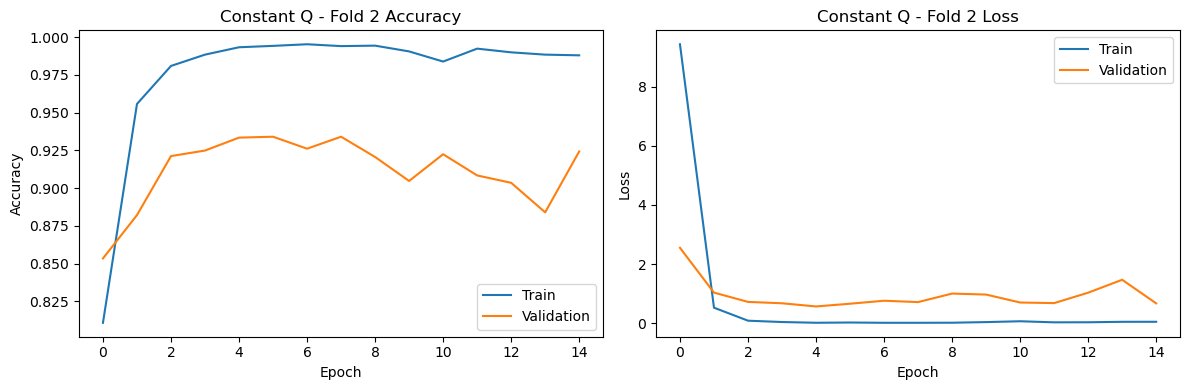

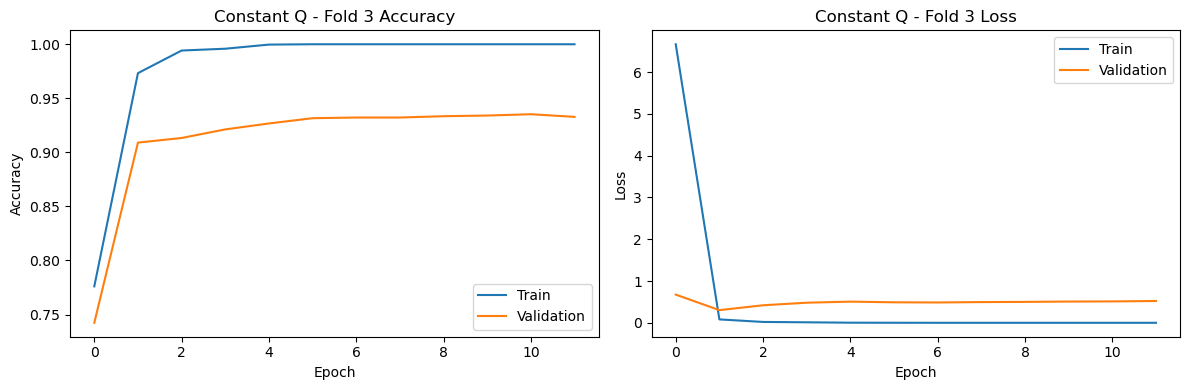

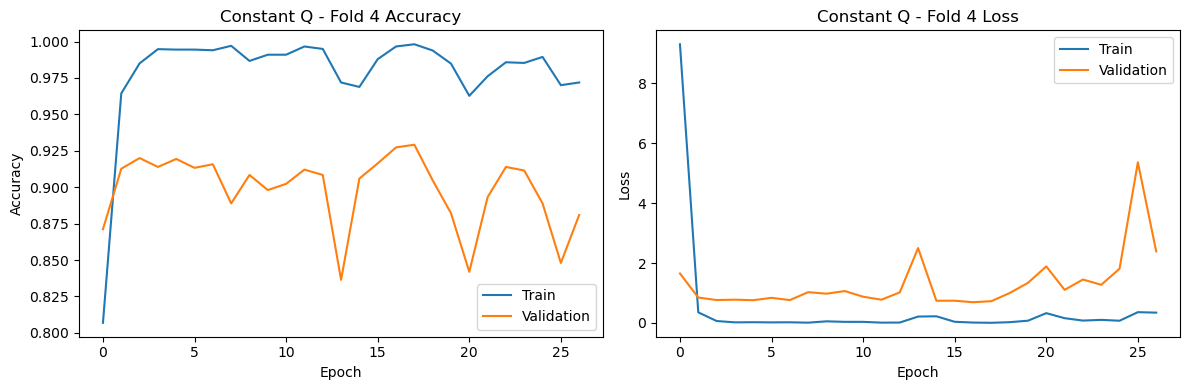

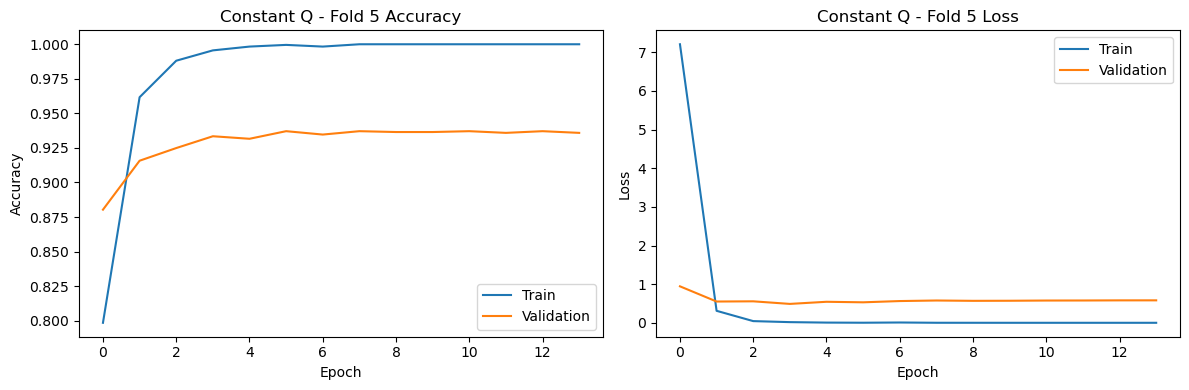


Stft Training History


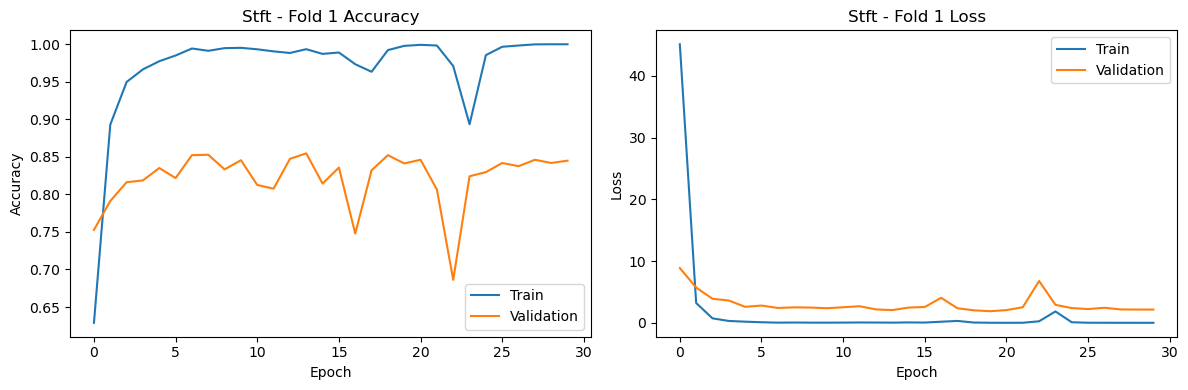

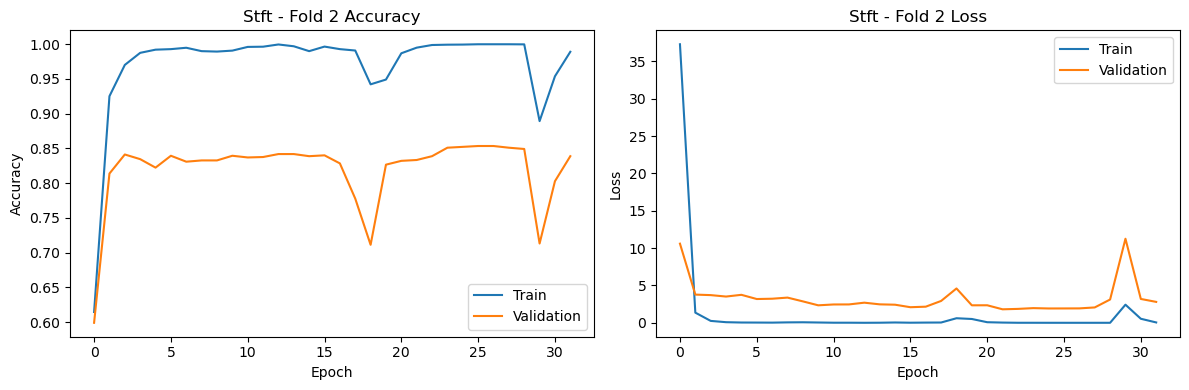

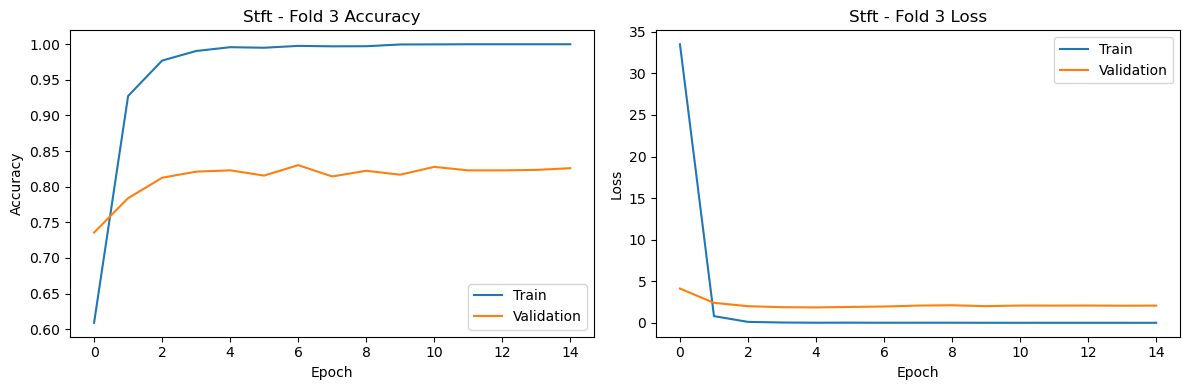

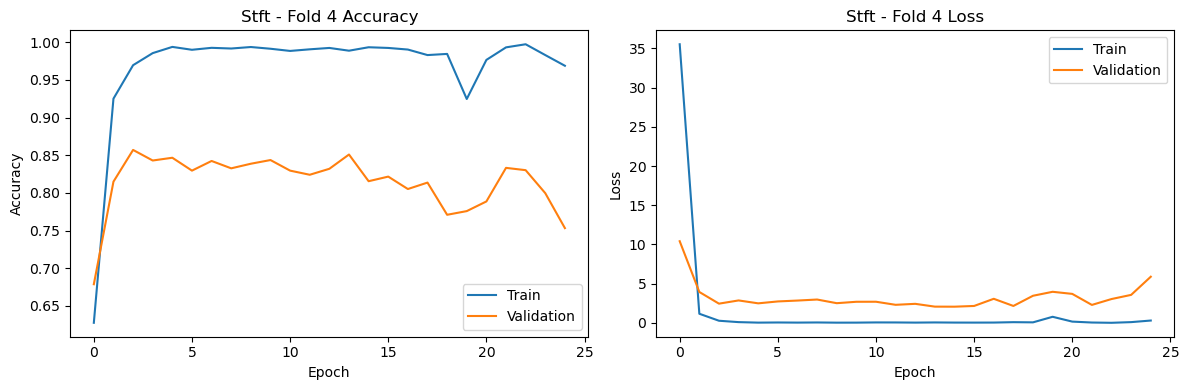

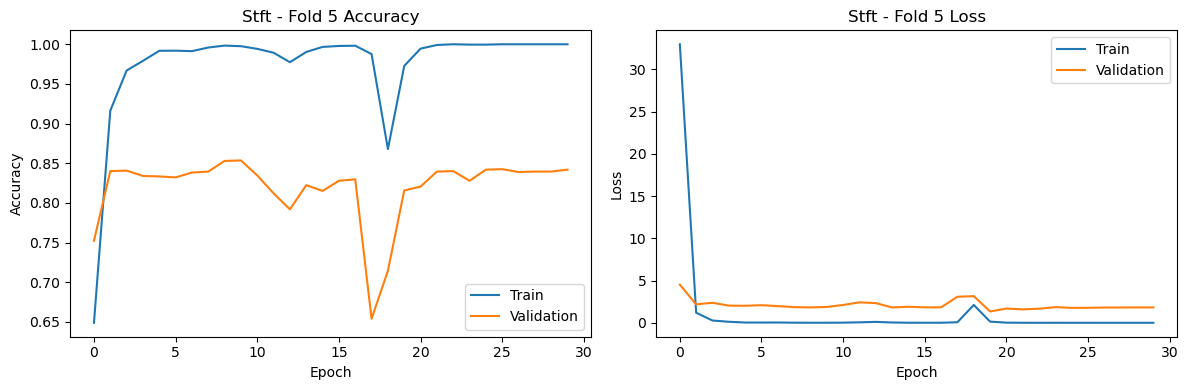


Harmonic Percussive Training History


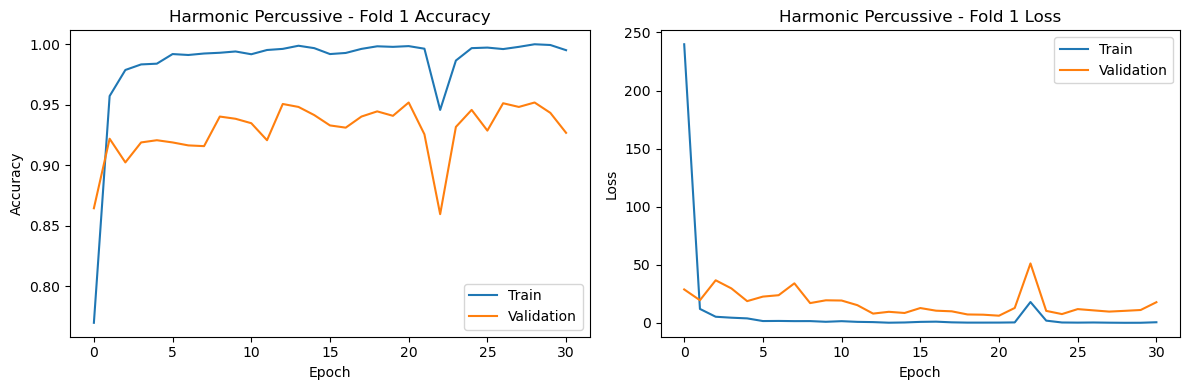

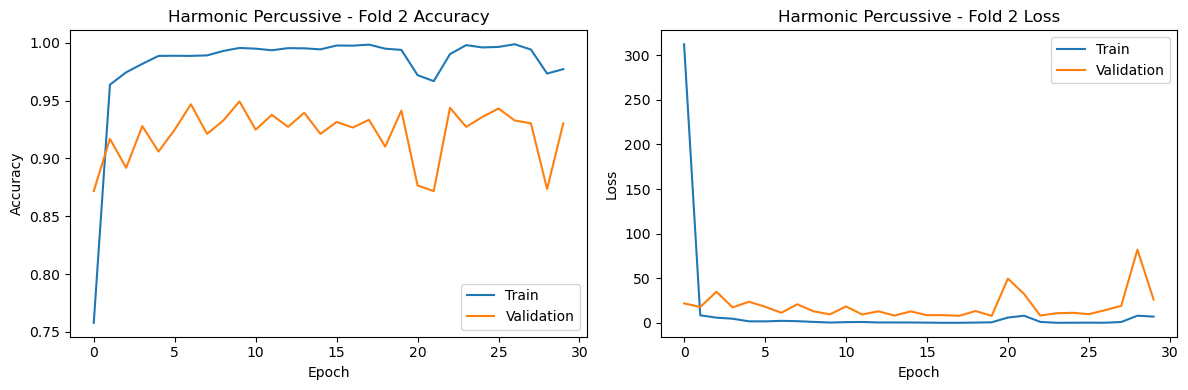

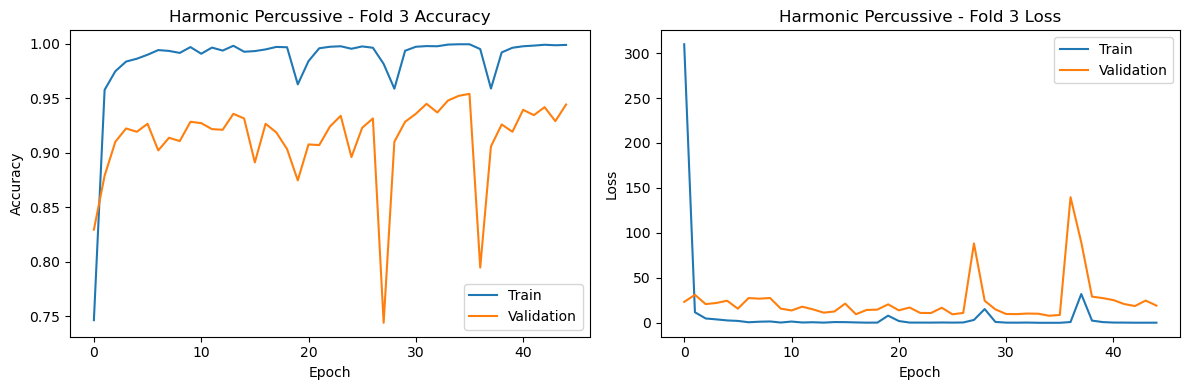

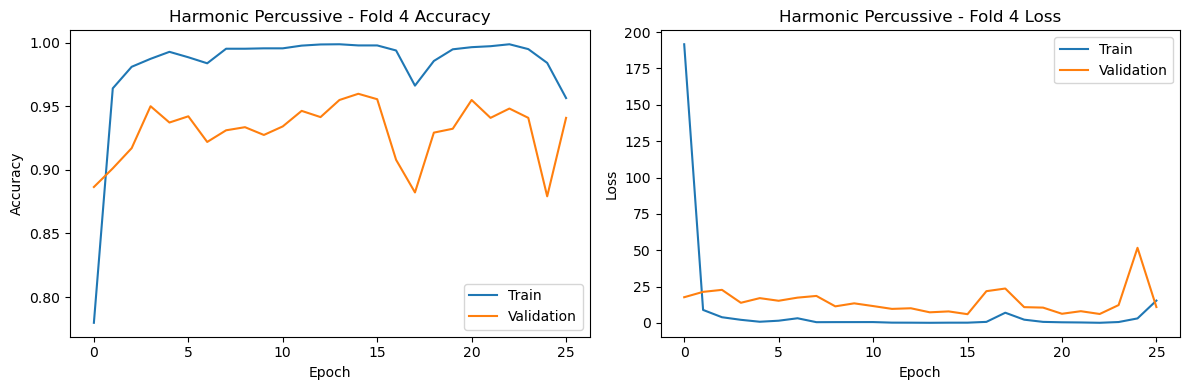

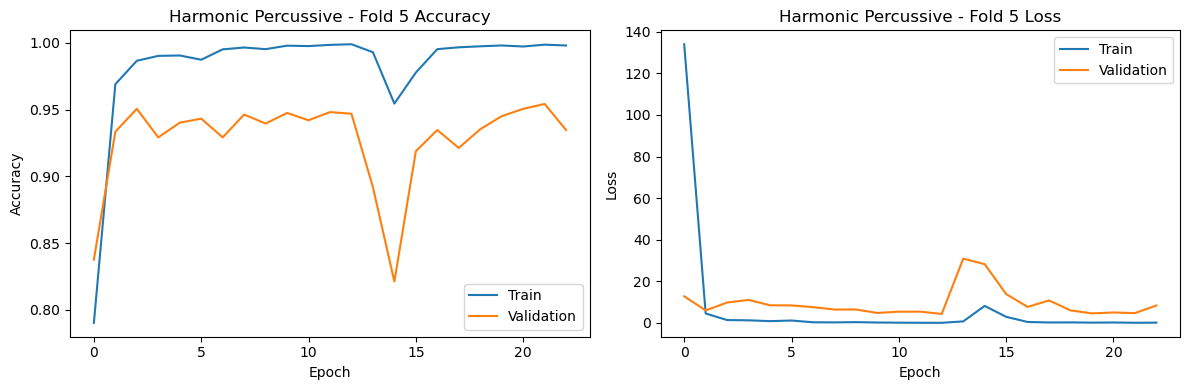


Onset Strength Training History


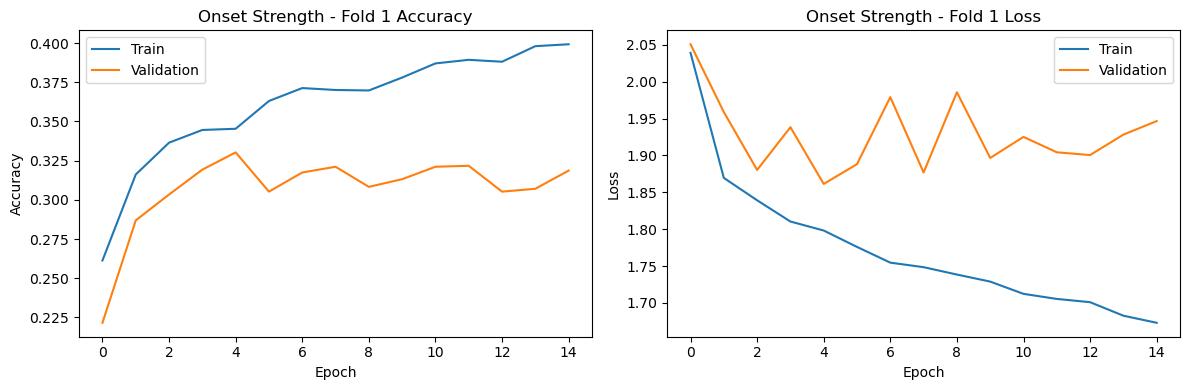

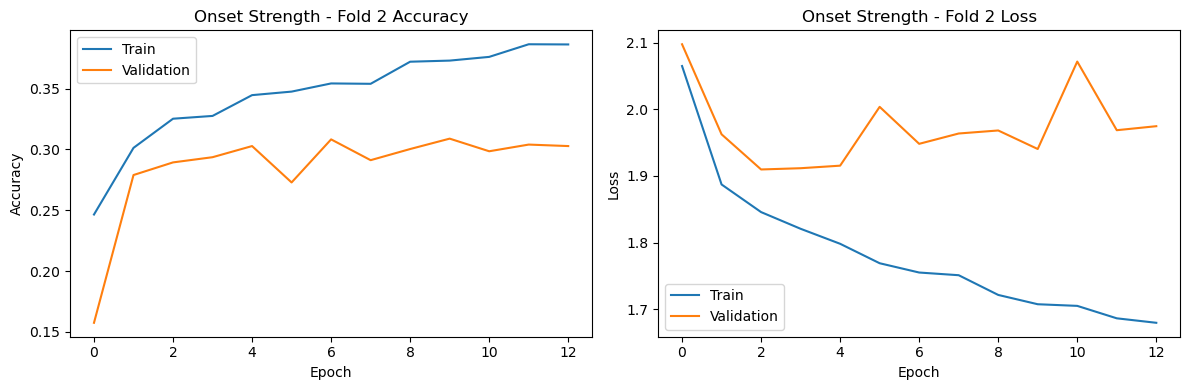

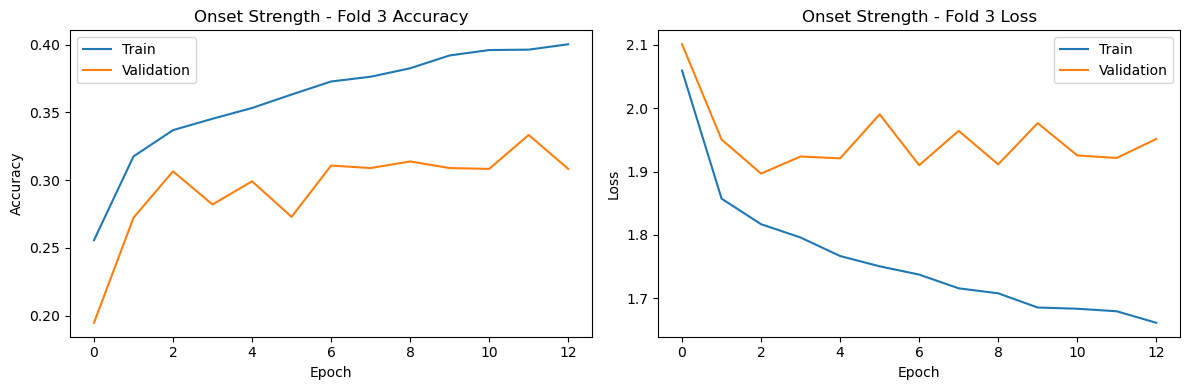

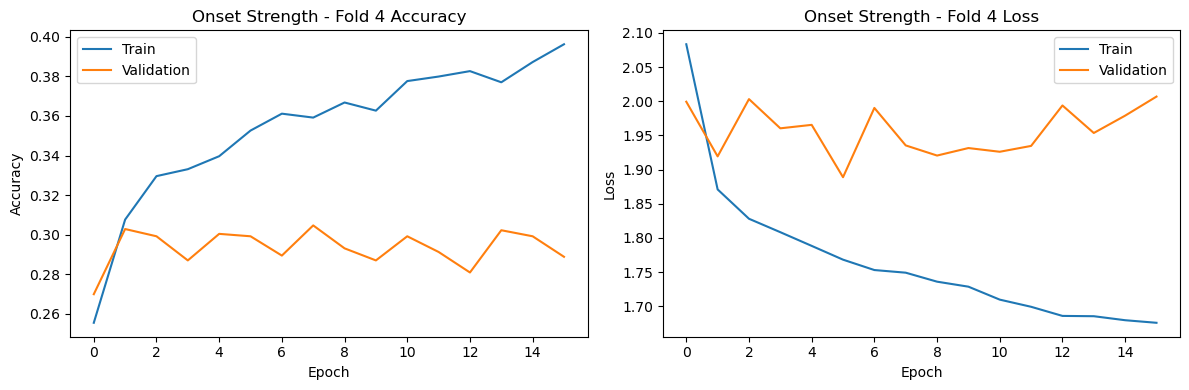

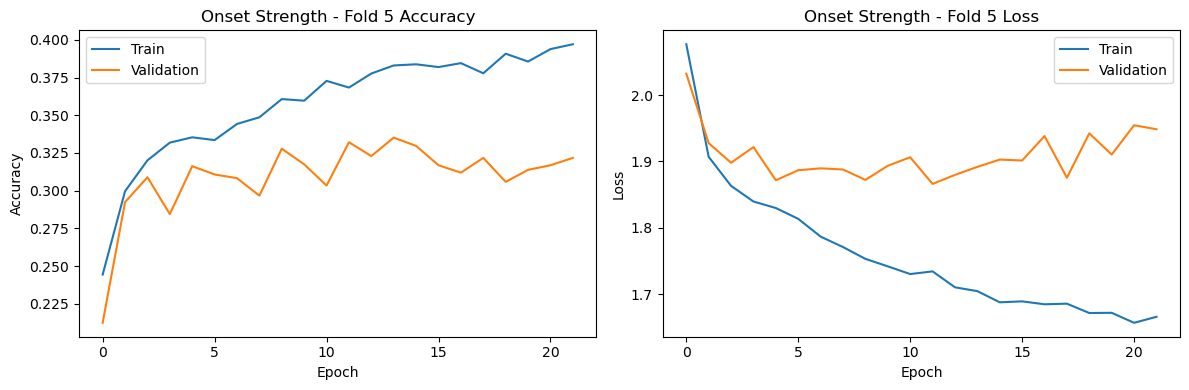

In [11]:
# Plot training/validation accuracy and loss for each model and fold
for feature_type, results in individual_results.items():
    histories = results.get('histories', [])
    if not histories:
        continue
    print(f"\n{'='*40}\n{feature_type.replace('_', ' ').title()} Training History\n{'='*40}")
    for fold, history in enumerate(histories):
        plt.figure(figsize=(12, 4))
        # Accuracy
        plt.subplot(1, 2, 1)
        plt.plot(history.get("accuracy", []), label="Train")
        plt.plot(history.get("val_accuracy", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Accuracy")
        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.legend()
        # Loss
        plt.subplot(1, 2, 2)
        plt.plot(history.get("loss", []), label="Train")
        plt.plot(history.get("val_loss", []), label="Validation")
        plt.title(f"{feature_type.replace('_', ' ').title()} - Fold {fold+1} Loss")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.legend()
        plt.tight_layout()
        plt.show()

In [12]:
# Get best individual model by mean accuracy
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_acc = np.array(ensemble_results['accuracy_list'])
individual_acc = np.array(individual_results[best_model]['accuracy_list'])

t_stat, p_val = ttest_rel(ensemble_acc, individual_acc)
print(f"Paired t-test p-value (ensemble vs best individual): {p_val:.4e}")
if p_val < 0.05:
    print("Difference is statistically significant (p < 0.05)")
else:
    print("Difference is NOT statistically significant (p >= 0.05)")

Paired t-test p-value (ensemble vs best individual): 7.9887e-04
Difference is statistically significant (p < 0.05)


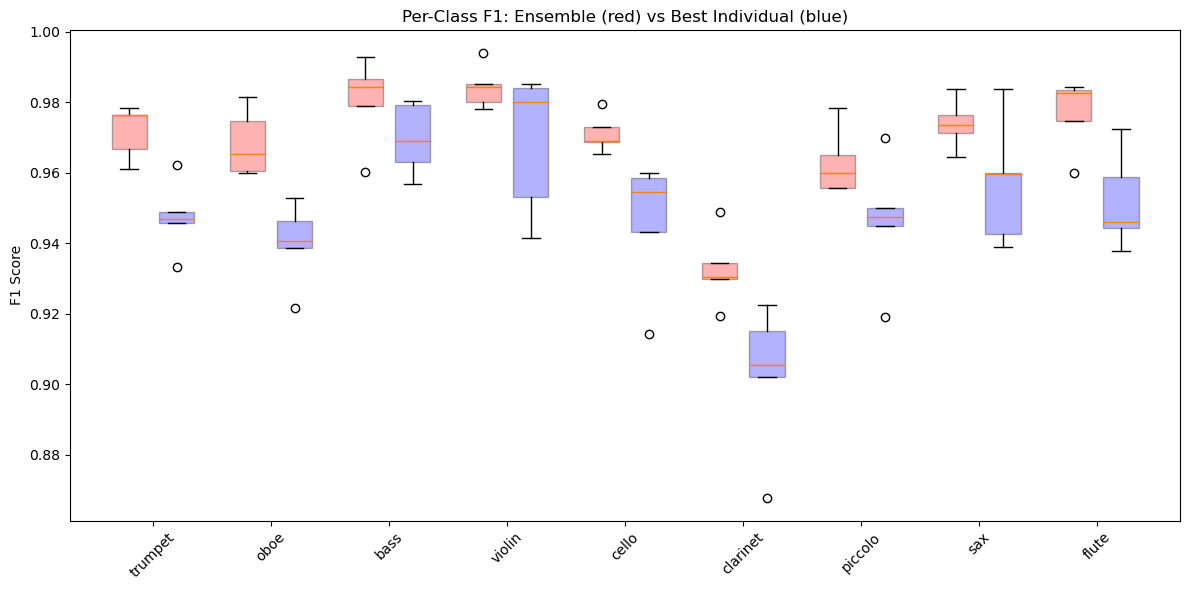

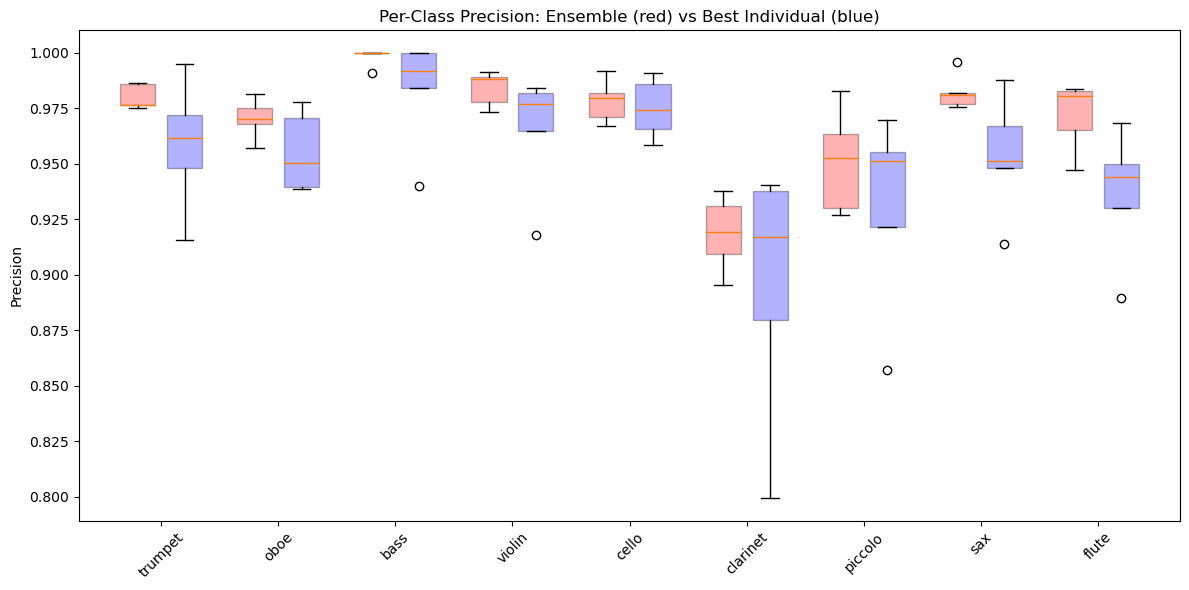

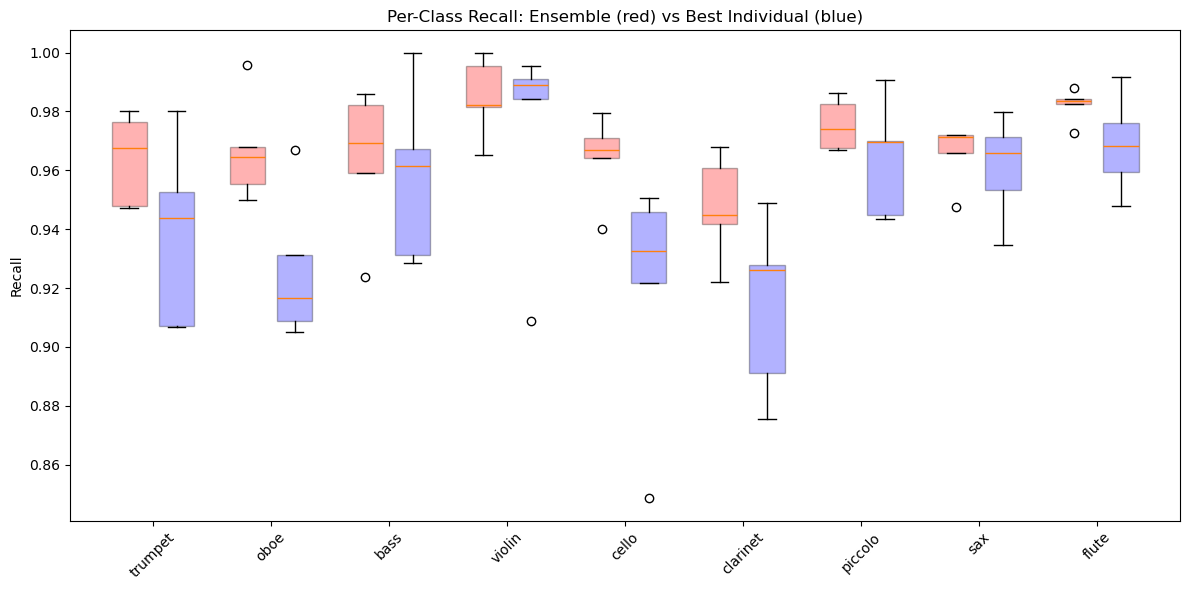

In [13]:
# Compare per-class F1, Precision, Recall between ensemble and best individual model
best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
ensemble_f1, individual_f1 = [], []
ensemble_prec, individual_prec = [], []
ensemble_rec, individual_rec = [], []

class_labels = [str(i) for i in range(len(class_names))]

for fold in range(len(ensemble_results['classification_reports'])):
    e_report = ensemble_results['classification_reports'][fold]
    i_report = individual_results[best_model]['classification_reports'][fold]
    ensemble_f1.append([e_report[c]['f1-score'] for c in class_labels])
    individual_f1.append([i_report[c]['f1-score'] for c in class_labels])
    ensemble_prec.append([e_report[c]['precision'] for c in class_labels])
    individual_prec.append([i_report[c]['precision'] for c in class_labels])
    ensemble_rec.append([e_report[c]['recall'] for c in class_labels])
    individual_rec.append([i_report[c]['recall'] for c in class_labels])

ensemble_f1 = np.array(ensemble_f1)
individual_f1 = np.array(individual_f1)
ensemble_prec = np.array(ensemble_prec)
individual_prec = np.array(individual_prec)
ensemble_rec = np.array(ensemble_rec)
individual_rec = np.array(individual_rec)

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_f1[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('F1 Score')
plt.title('Per-Class F1: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_prec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Precision')
plt.title('Per-Class Precision: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
plt.boxplot([ensemble_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))-0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='red', alpha=0.3), labels=class_names)
plt.boxplot([individual_rec[:,i] for i in range(len(class_names))], positions=np.arange(len(class_names))+0.2, widths=0.3, patch_artist=True, boxprops=dict(facecolor='blue', alpha=0.3))
plt.xticks(np.arange(len(class_names)), class_names, rotation=45)
plt.ylabel('Recall')
plt.title('Per-Class Recall: Ensemble (red) vs Best Individual (blue)')
plt.tight_layout()
plt.show()

In [14]:
# Show top-3 most confused class pairs for ensemble and best individual (by sum of off-diagonal confusion)
def top_confusions(conf_matrices, class_names, top_n=3):
    total_conf = np.sum(np.array(conf_matrices), axis=0)
    np.fill_diagonal(total_conf, 0)
    flat = total_conf.flatten()
    top_idx = flat.argsort()[-top_n:][::-1]
    for idx in top_idx:
        i, j = divmod(idx, total_conf.shape[1])
        print(f"True: {class_names[i]}, Pred: {class_names[j]}, Count: {total_conf[i, j]}")

print("Top 3 most confused class pairs (Ensemble):")
top_confusions(ensemble_results['confusion_matrices'], class_names)

best_model = performance_df.iloc[0]['Feature Type'].replace(' ', '_').lower()
print("\nTop 3 most confused class pairs (Best Individual):")
top_confusions(individual_results[best_model]['confusion_matrices'], class_names)

Top 3 most confused class pairs (Ensemble):
True: bass, Pred: cello, Count: 20
True: oboe, Pred: clarinet, Count: 19
True: clarinet, Pred: piccolo, Count: 18

Top 3 most confused class pairs (Best Individual):
True: oboe, Pred: piccolo, Count: 30
True: cello, Pred: clarinet, Count: 30
True: clarinet, Pred: flute, Count: 29


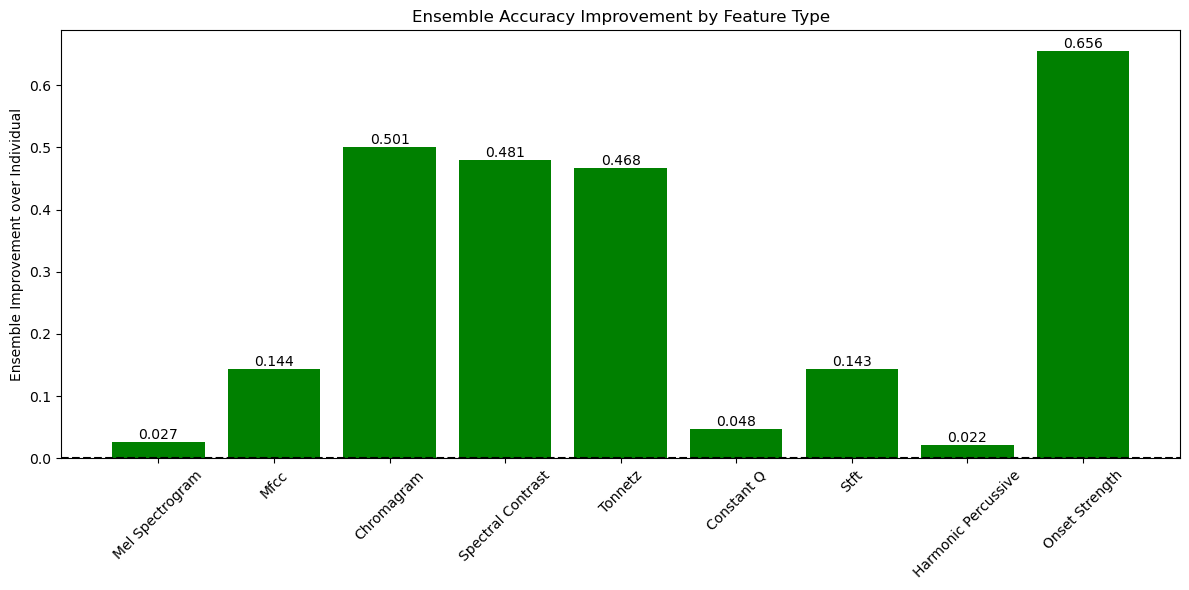

In [15]:
# Bar plot of (ensemble accuracy - individual accuracy) per feature type
improvements = []
for ft in FEATURE_TYPES:
    if ft in individual_results:
        individual_mean = np.mean(individual_results[ft]['accuracy_list'])
        improvement = np.mean(ensemble_results['accuracy_list']) - individual_mean
        improvements.append(improvement)
    else:
        improvements.append(np.nan)

plt.figure(figsize=(12, 6))
bars = plt.bar([ft.replace('_', ' ').title() for ft in FEATURE_TYPES], improvements, color=['green' if imp > 0 else 'red' for imp in improvements])
plt.axhline(0, color='black', linestyle='--')
plt.ylabel('Ensemble Improvement over Individual')
plt.title('Ensemble Accuracy Improvement by Feature Type')
plt.xticks(rotation=45)
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{improvements[i]:.3f}", ha='center', va='bottom' if improvements[i] > 0 else 'top')
plt.tight_layout()
plt.show()

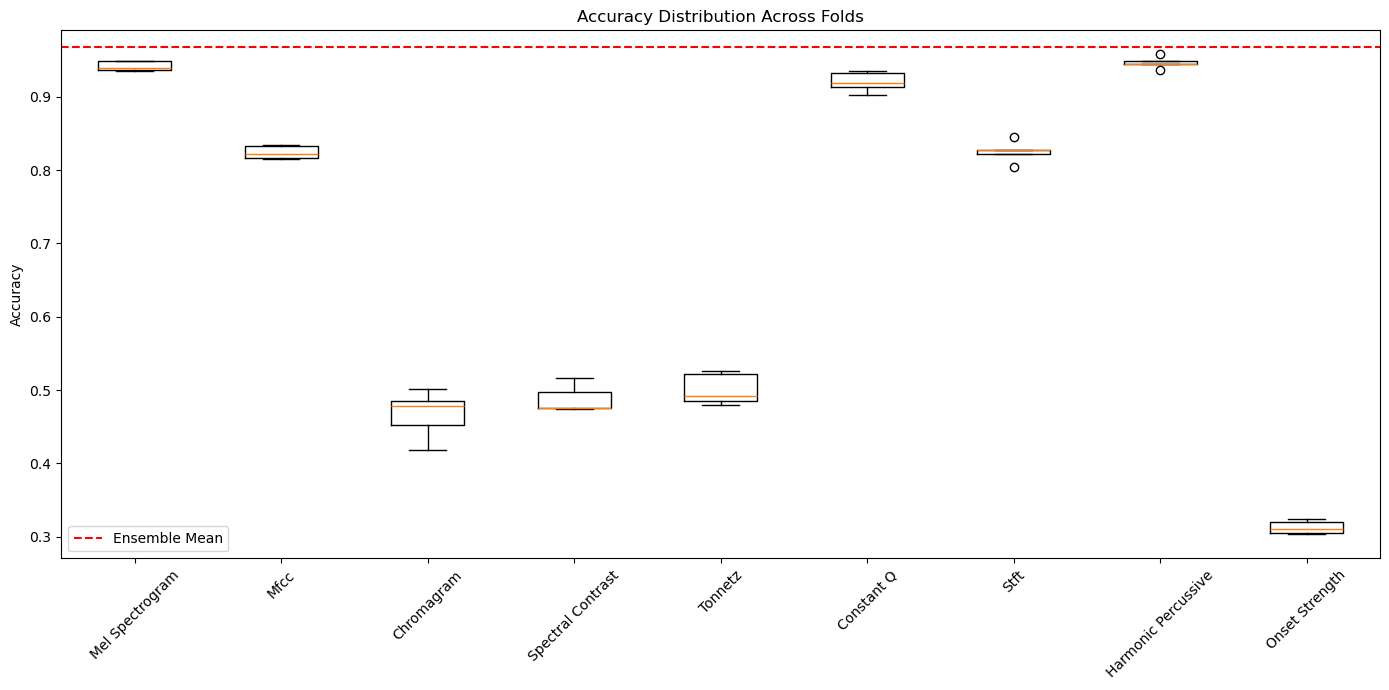

In [16]:
# Boxplot of accuracy distributions across folds for each model and the ensemble
data_for_box = [individual_results[ft]['accuracy_list'] for ft in FEATURE_TYPES if ft in individual_results]
labels = [ft.replace('_', ' ').title() for ft in FEATURE_TYPES if ft in individual_results]

plt.figure(figsize=(14, 7))
plt.boxplot(data_for_box, labels=labels)
plt.axhline(np.mean(ensemble_results['accuracy_list']), color='red', linestyle='--', label='Ensemble Mean')
plt.ylabel('Accuracy')
plt.title('Accuracy Distribution Across Folds')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Show the worst and best performing fold for each model and the ensemble
print("Worst and Best Fold Accuracies:")
for ft in FEATURE_TYPES:
    if ft in individual_results:
        accs = individual_results[ft]['accuracy_list']
        print(f"{ft.replace('_', ' ').title()}: Min={np.min(accs):.4f}, Max={np.max(accs):.4f}")
ensemble_accs = ensemble_results['accuracy_list']
print(f"Ensemble: Min={np.min(ensemble_accs):.4f}, Max={np.max(ensemble_accs):.4f}")

Worst and Best Fold Accuracies:
Mel Spectrogram: Min=0.9355, Max=0.9482
Mfcc: Min=0.8149, Max=0.8339
Chromagram: Min=0.4187, Max=0.5020
Spectral Contrast: Min=0.4748, Max=0.5166
Tonnetz: Min=0.4797, Max=0.5264
Constant Q: Min=0.9028, Max=0.9355
Stft: Min=0.8046, Max=0.8451
Harmonic Percussive: Min=0.9365, Max=0.9580
Onset Strength: Min=0.3034, Max=0.3239
Ensemble: Min=0.9653, Max=0.9722
